# **Analysis of cluster RCT data**
Note that, if you cannot run R in your jupyter environment, please access the following: https://drive.google.com/file/d/1VbCmD_HanDxkKqZWUVkxd2W7yl8aMkWJ/view?usp=sharing

**Preparation**

Install libraries for data analysis

In [ ]:
install.packages("epiDisplay")
install.packages("stringr")
install.packages("ggpubr")
install.packages("lmerTest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Import the essential libraries

In [ ]:
library(tidyverse)
library(epiDisplay)
library(stringr)
library(ggpubr)
library(lmerTest)
library(data.table)
library(car)

Loading required package: foreign

Loading required package: survival

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: nnet


Attaching package: ‘epiDisplay’


The following object is masked from ‘package:ggplot2’:

    alpha


Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    tr

## **Table 1: demographic data of the observers**

Import data

In [ ]:
temp <- tempfile()
download.file("https://drive.usercontent.google.com/uc?id=1UFDxJclIYu9AxCeaFyzcb03wX3zNr0DM&authuser=0&export=download", temp)
demo_o<-readRDS(temp)

**Data dictionary**

| Variables | Definition                               |
|-----------|------------------------------------------|
| cluster   | Cluster ID                               |
| type      | Type of intervention: dot or vot         |
| age       | Age in year of patient                   |
| sex       | F: Female or M: Male                     |
| juris     | Number of patients under supervision     |

In [ ]:
demo_o$type<-factor(demo_o$type,levels=c("vot","dot"))

Create a summary comparison between two groups of those variables

In [ ]:
tableStack(age:juris,by=type,data=demo_o)

              vot        dot        Test stat.             P value
Total         19         19                                       
                                                                  
age                                 t-test  (36 df) = 0.98 0.331  
  mean(SD)    37.6 (4.9) 35.6 (7.1)                               
                                                                  
sex                                 Chisq. (1 df) = 0.45   0.501  
   female     11 (57.9)  13 (68.4)                                
   male       8 (42.1)   6 (31.6)                                 
                                                                  
juris                               Ranksum test           0.843  
  median(IQR) 4 (2,4)    4 (2.5,4)                                
                                                                  

## **Table 1: demographic data of the patients**

Import data

In [ ]:
temp <- tempfile()
download.file("https://drive.usercontent.google.com/uc?id=1ld_Xg1AMFJotBp6q4ezrMs3Ikj5MopgX&authuser=0&export=download", temp)
demo_p<-readRDS(temp)

**Data dictionary**

| Variables | Definition                                        |
|-----------|---------------------------------------------------|
| no        | ID number                                         |
| type      | Type of intervention: dot or vot                   |
| age       | Age in year of patient                            |
| sex       | F: Female or M: Male                               |
| lesion    | Location of lung lesion: left, right, or both      |
| cavity    | There is at least a cavity lesion                  |
| dm        | Underlying: diabetes mellitus                      |
| hiv       | Underlying: HIV infection                          |
| copd      | Underlying: Chronic obstructive pulmonary disease  |
| ca        | Underlying: any cancer                             |
| BW        | Weight                                            |
| Ht        | Height                                            |
| bmi       | Body mass index                                    |
| H         | Daily isoniazid tablets prescribed                 |
| R         | Daily rifampicin capsules prescribed               |
| Z         | Daily pyrazinamide tablets prescribed              |
| E         | Daily Ethambutol tablets prescribed                |


In [ ]:
demo_p$type<-factor(demo_p$type,levels=c("vot","dot"))

Create a summary comparison between two groups of those variables

In [ ]:
tableStack(age:E,by=type,data=demo_p)

              vot          dot         Test stat.              P value
Total         63           65                                         
                                                                      
age                                    t-test  (126 df) = 1.83 0.069  
  mean(SD)    46.3 (14.2)  51.2 (16)                                  
                                                                      
sex                                    Chisq. (1 df) = 0.79    0.374  
   F          21 (33.3)    17 (26.2)                                  
   M          42 (66.7)    48 (73.8)                                  
                                                                      
lesion                                 Chisq. (2 df) = 2.93    0.231  
   both       11 (17.5)    18 (27.7)                                  
   left       35 (55.6)    27 (41.5)                                  
   right      17 (27)      20 (30.8)                                  
      

# **Analysis of compliance data**

**Import data**

Note that, we import data from an online source that can be updated every month. Data update will be stopped following completion of data collection.

*import patient data audited (DOT: no audit)*

In [ ]:
temp <- tempfile()
download.file("https://drive.usercontent.google.com/uc?id=14STifqmvA7AXQ1AHvFPEHgoJn8tHqj5b&authuser=0&export=download", temp)
longpat<-readRDS(temp)

*import observer data audited*

In [ ]:
temp <- tempfile()
download.file("https://drive.usercontent.google.com/uc?id=1LJYjjnttAEF5DmIhqzL_q3eO_RMViJIj&authuser=0&export=download", temp)
longob<-readRDS(temp)

Import refusal data on VOT

In [ ]:
temp <- tempfile()
download.file("https://drive.usercontent.google.com/uc?id=1o976wSAjcDT6xeY_YCj_pl1l-pRJmY3O&authuser=0&export=download", temp)
refuse_vot<-readRDS(temp)

**Descriptive data visualization**

# **VOT**

*Visualization of patients' compliance days*

Data manipulation of the patients

In [ ]:
longvot<-longpat[longpat$type=="vot",-2]
longvot<-longvot[longvot$session != 0,]
ordvot<-longvot %>% group_by(no) %>% summarise(m=max(day[day!=62]),peak = sum(day[day!=62])) %>% arrange(m,peak)
longvot$no<-factor(longvot$no,levels = ordvot$no)
longvot$session<-factor(longvot$session)
ag_longvot<-longvot[longvot$day != 62,] %>% group_by(no) %>% summarise(day = max(day))
ag_longvot$day<-ifelse(ag_longvot$day<54,ag_longvot$day+7,61)
ag_longvot$day[ag_longvot$no %in% refuse_vot$no]<-0
longvot<-longvot[longvot$day != 0,]
ordvot$axis<-1:nrow(ordvot)
ordob<-merge(ordvot,longpat[longpat$day==0,c("no","cluster")],by="no",all.x=TRUE)
ordob<-ordob %>% arrange(axis)

Import compliace detail

In [ ]:
temp <- tempfile()
download.file("https://drive.usercontent.google.com/uc?id=1AEQdG4lqPiuuN3y2_AtSH-avU2PWGSJE&authuser=0&export=download", temp)
insert_vot<-readRDS(temp)

Visualization of patients' compliance days in the VOT group

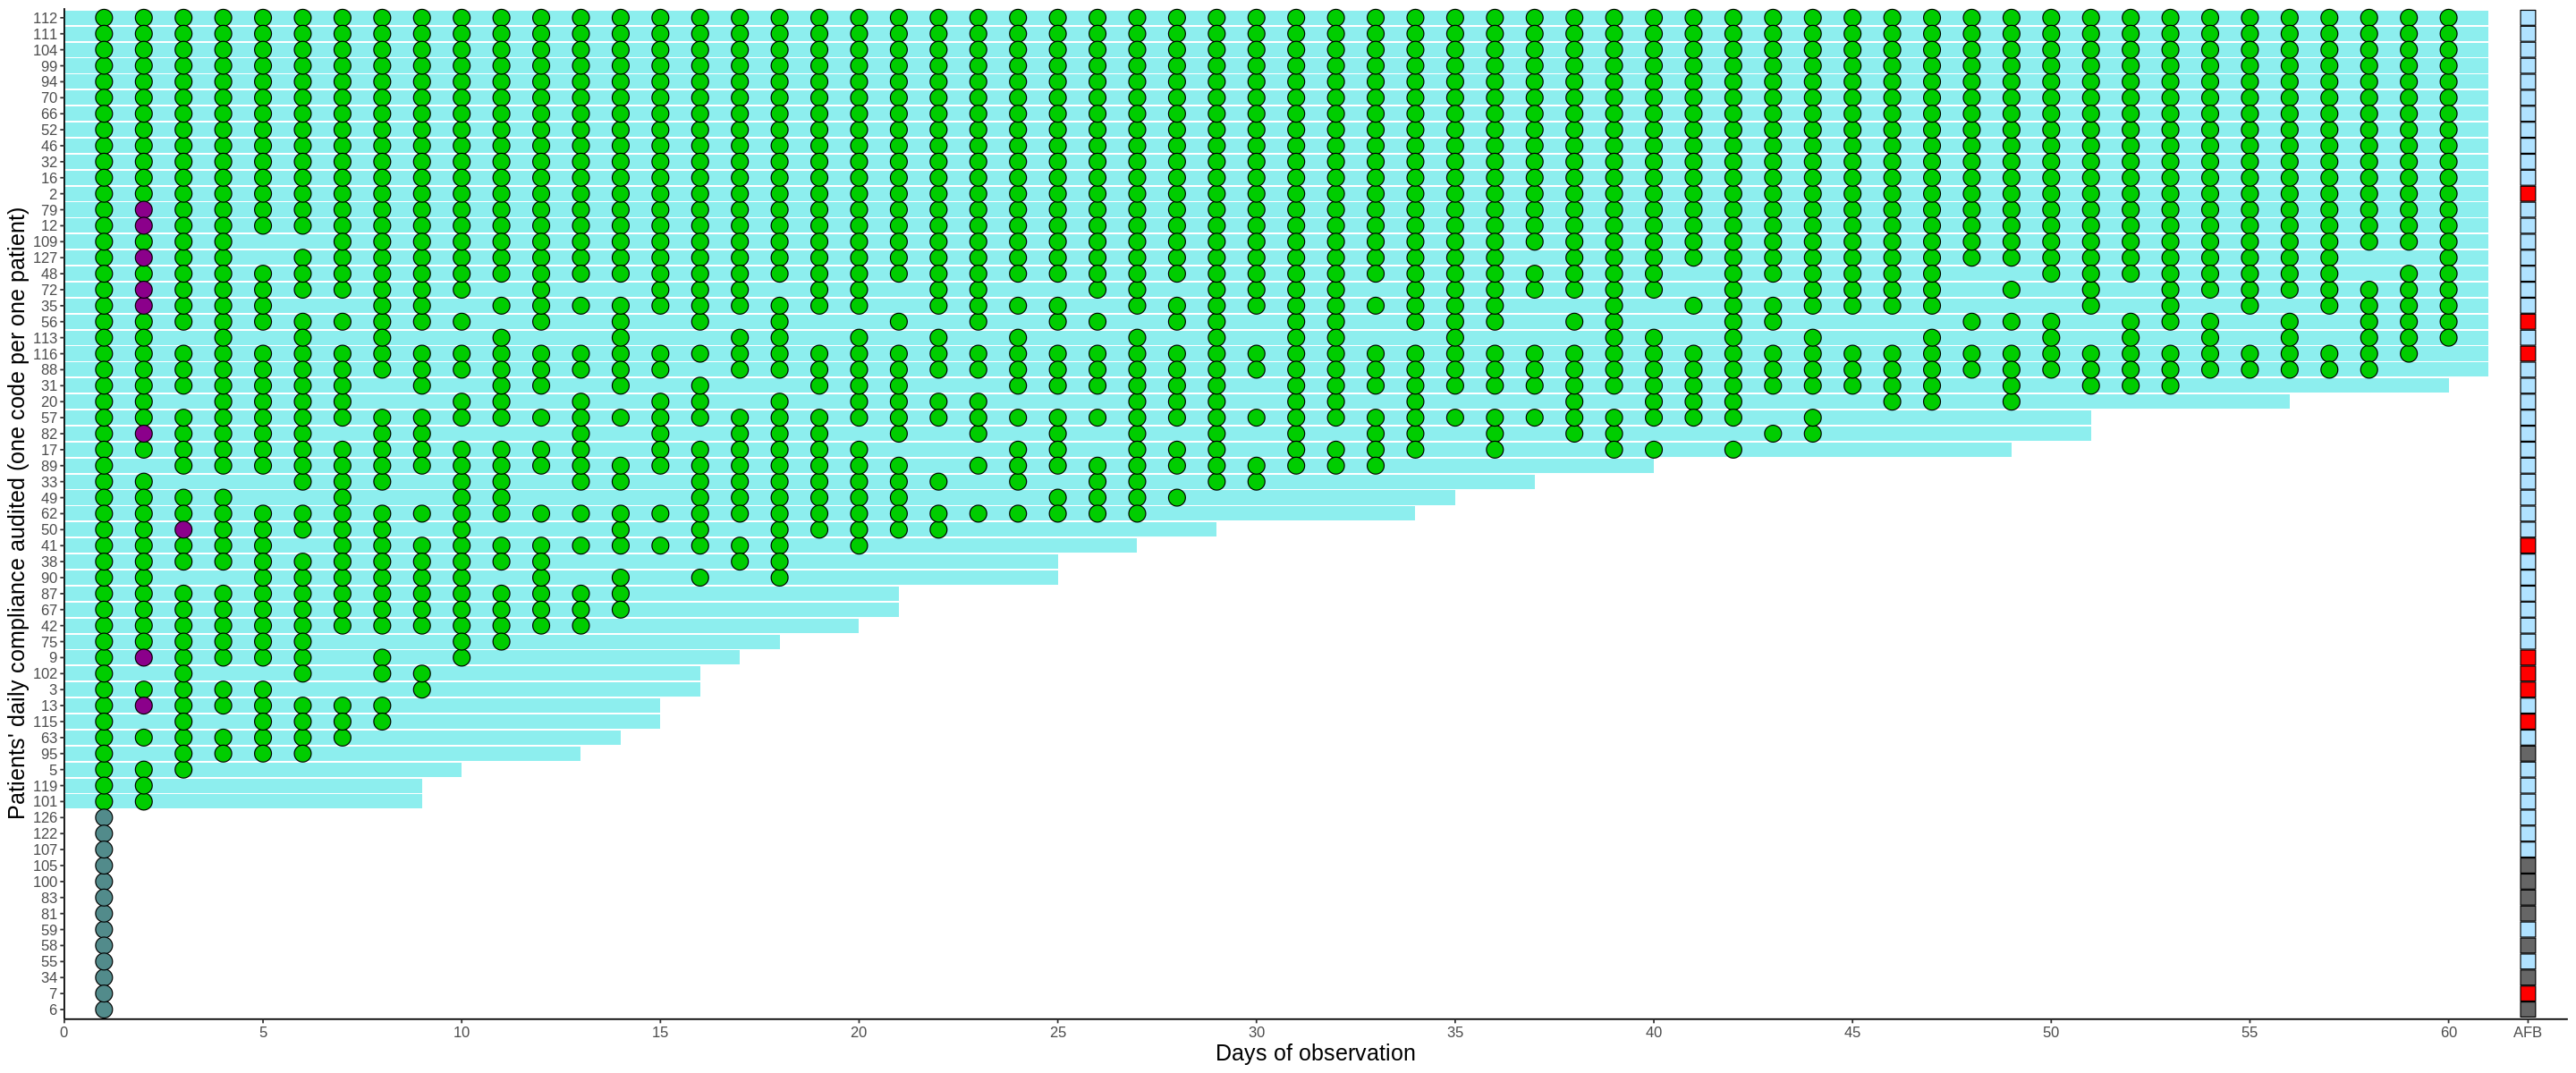

In [ ]:
options(repr.plot.width=24, repr.plot.height=10)
fig_votpat<-ggplot()+geom_bar(data=ag_longvot,aes(x=day,y=no),stat="identity",fill = "darkslategray2")+
  geom_point(data=longvot[longvot$day == 62,],aes(x=day,y=no,fill=session),
                                                               colour="black",pch=22, size=5,show.legend = FALSE)+
  geom_point(data=longvot[longvot$day != 62,],aes(x=day,y=no,fill=session),
             colour="black",pch=21, size=5,show.legend = FALSE)+
  geom_point(data=refuse_vot,aes(x=day,y=no), fill="darkslategray4",
             colour="black",pch=21, size=5,show.legend = FALSE)+
  geom_point(data=insert_vot,aes(x=day,y=no), fill="darkmagenta",
             colour="black",pch=21, size=5,show.legend = FALSE)+
  scale_x_continuous(breaks=c(0,5*1:12,62),labels = c(0,5*1:12,"AFB"),expand = c(0,0),limits = c(0,63))+
  scale_fill_manual(values = c("green3","lightskyblue1","red","grey40"))+
  xlab("Days of observation")+
  ylab("Patients' daily compliance audited (one code per one patient)")+
  theme_classic()+
  theme(axis.text.x = element_text(size=10),
        axis.text.y = element_text(size=10),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size=15))
fig_votpat

Data manipulation of the observers

In [ ]:
longvotob<-longob[longob$type=="vot",-2]
longvotob$no<-factor(longvotob$no,levels = ordvot$no)
longvotob<-longvotob[longvotob$session!=0,]
longvotob<-longvotob[longvotob$day!=0,]

Visualization of observers' compliance days in the VOT group

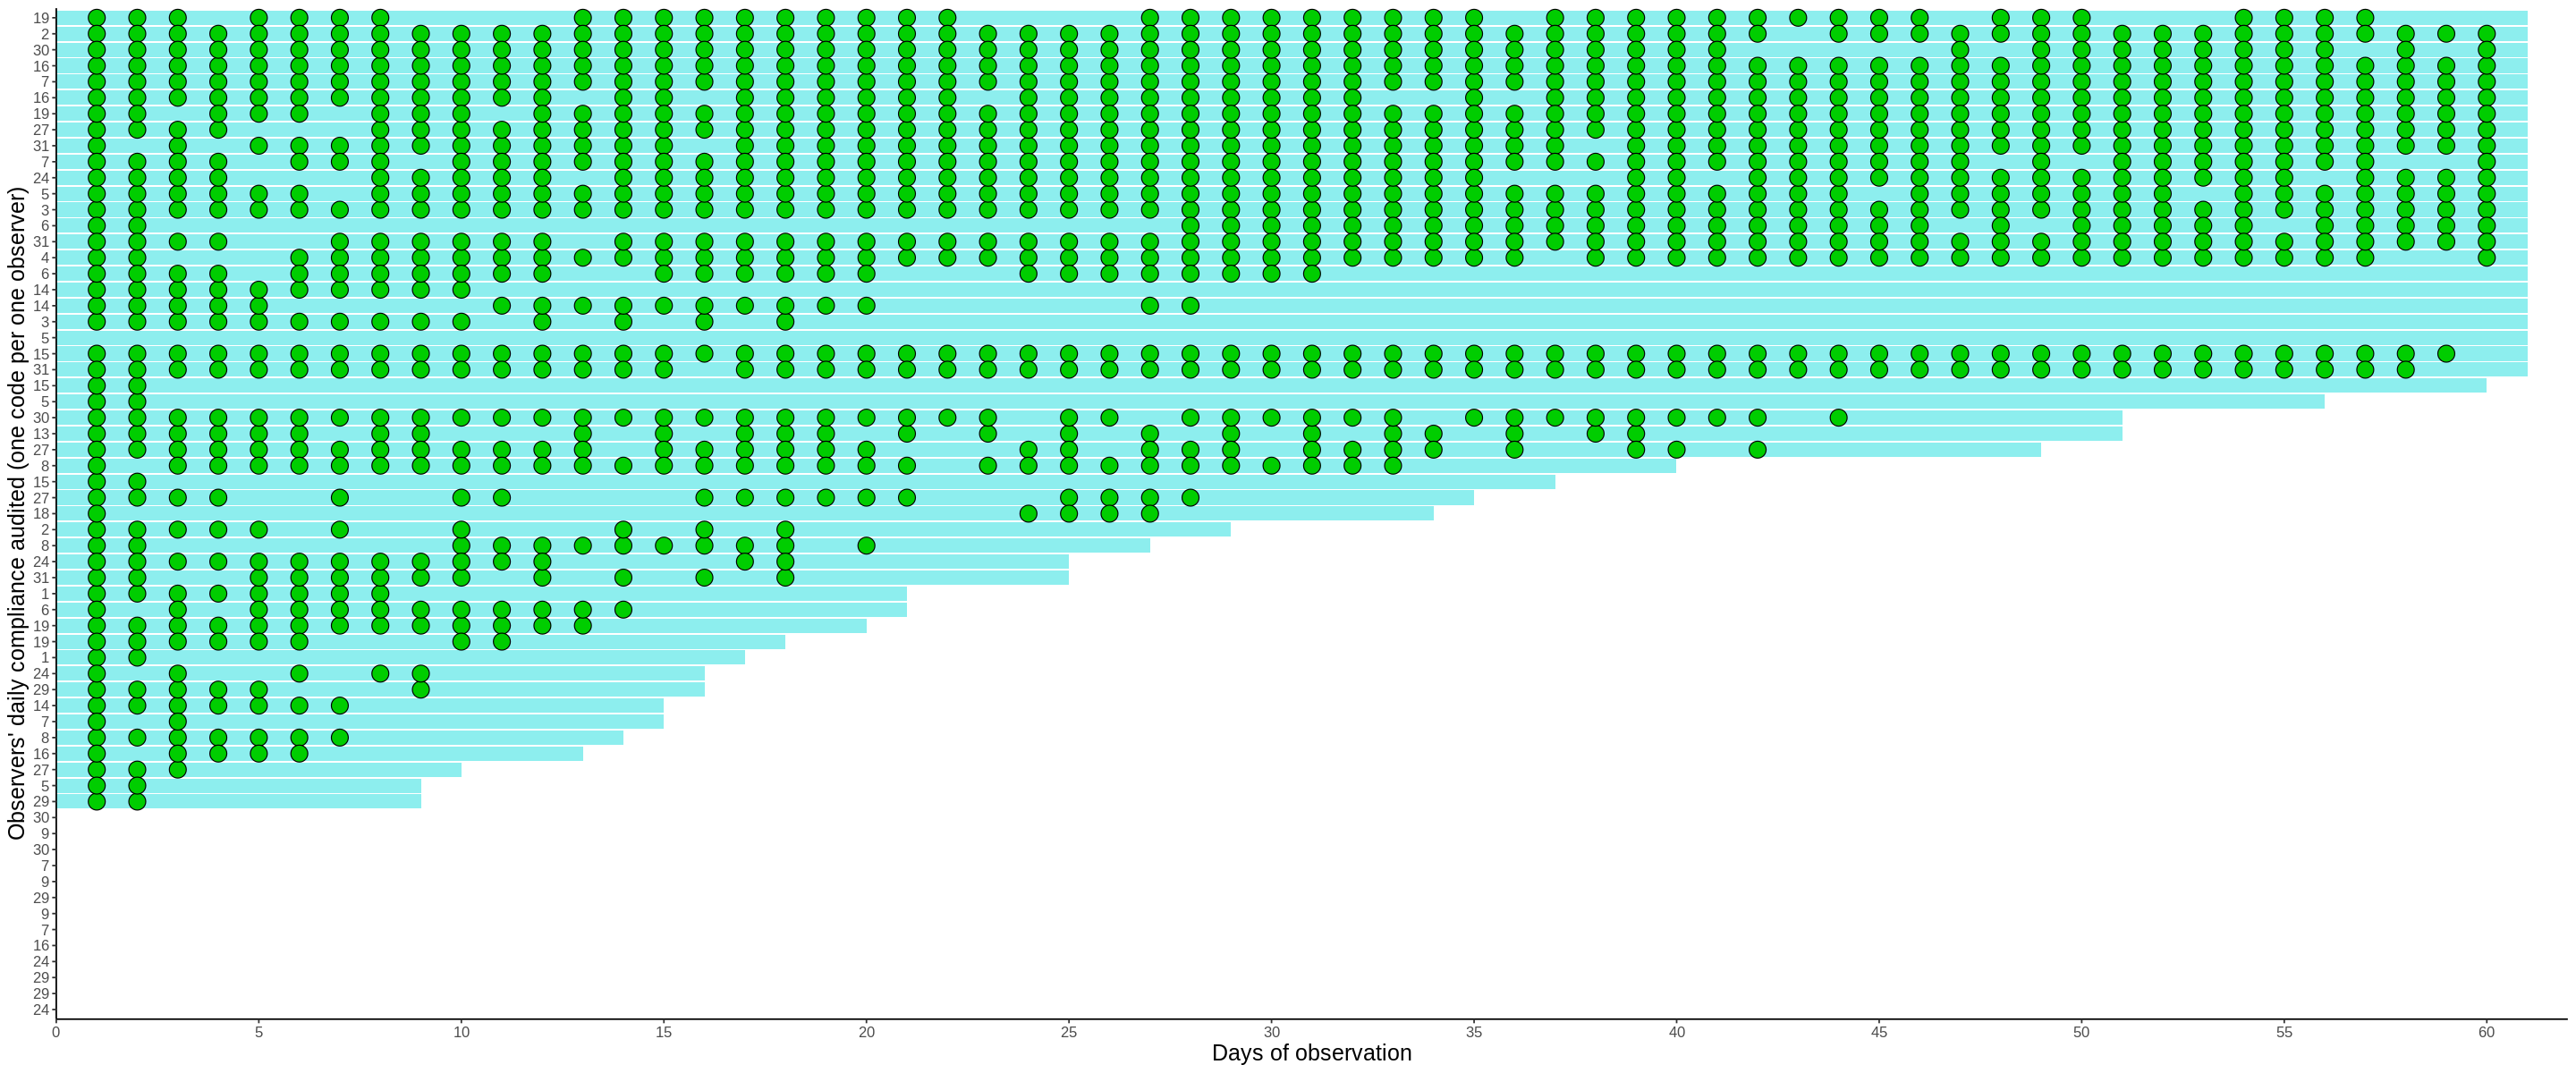

In [ ]:
fig_votob<-ggplot()+
  geom_bar(data=ag_longvot,aes(x=day,y=no),stat="identity",fill = "darkslategray2")+
  geom_point(data=longvotob,aes(x=day,y=no,fill=factor(session),col=factor(session)),
                                             pch=21, size=5,show.legend = FALSE)+
  scale_x_continuous(breaks=c(0,5*1:12),labels = c(0,5*1:12),expand = c(0,0),limits = c(0,62))+
  scale_y_discrete(labels=ordob$cluster)+
  scale_fill_manual(values = c("green3","white"))+
  scale_colour_manual(values = c("black","white"))+
  xlab("Days of observation")+
  ylab("Observers' daily compliance audited (one code per one observer)")+
  theme_classic()+
  theme(axis.text.x = element_text(size=10),
        axis.text.y = element_text(size=10),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size=15))
fig_votob

Combine visualization of patients’ and observers’ compliance days in VOT

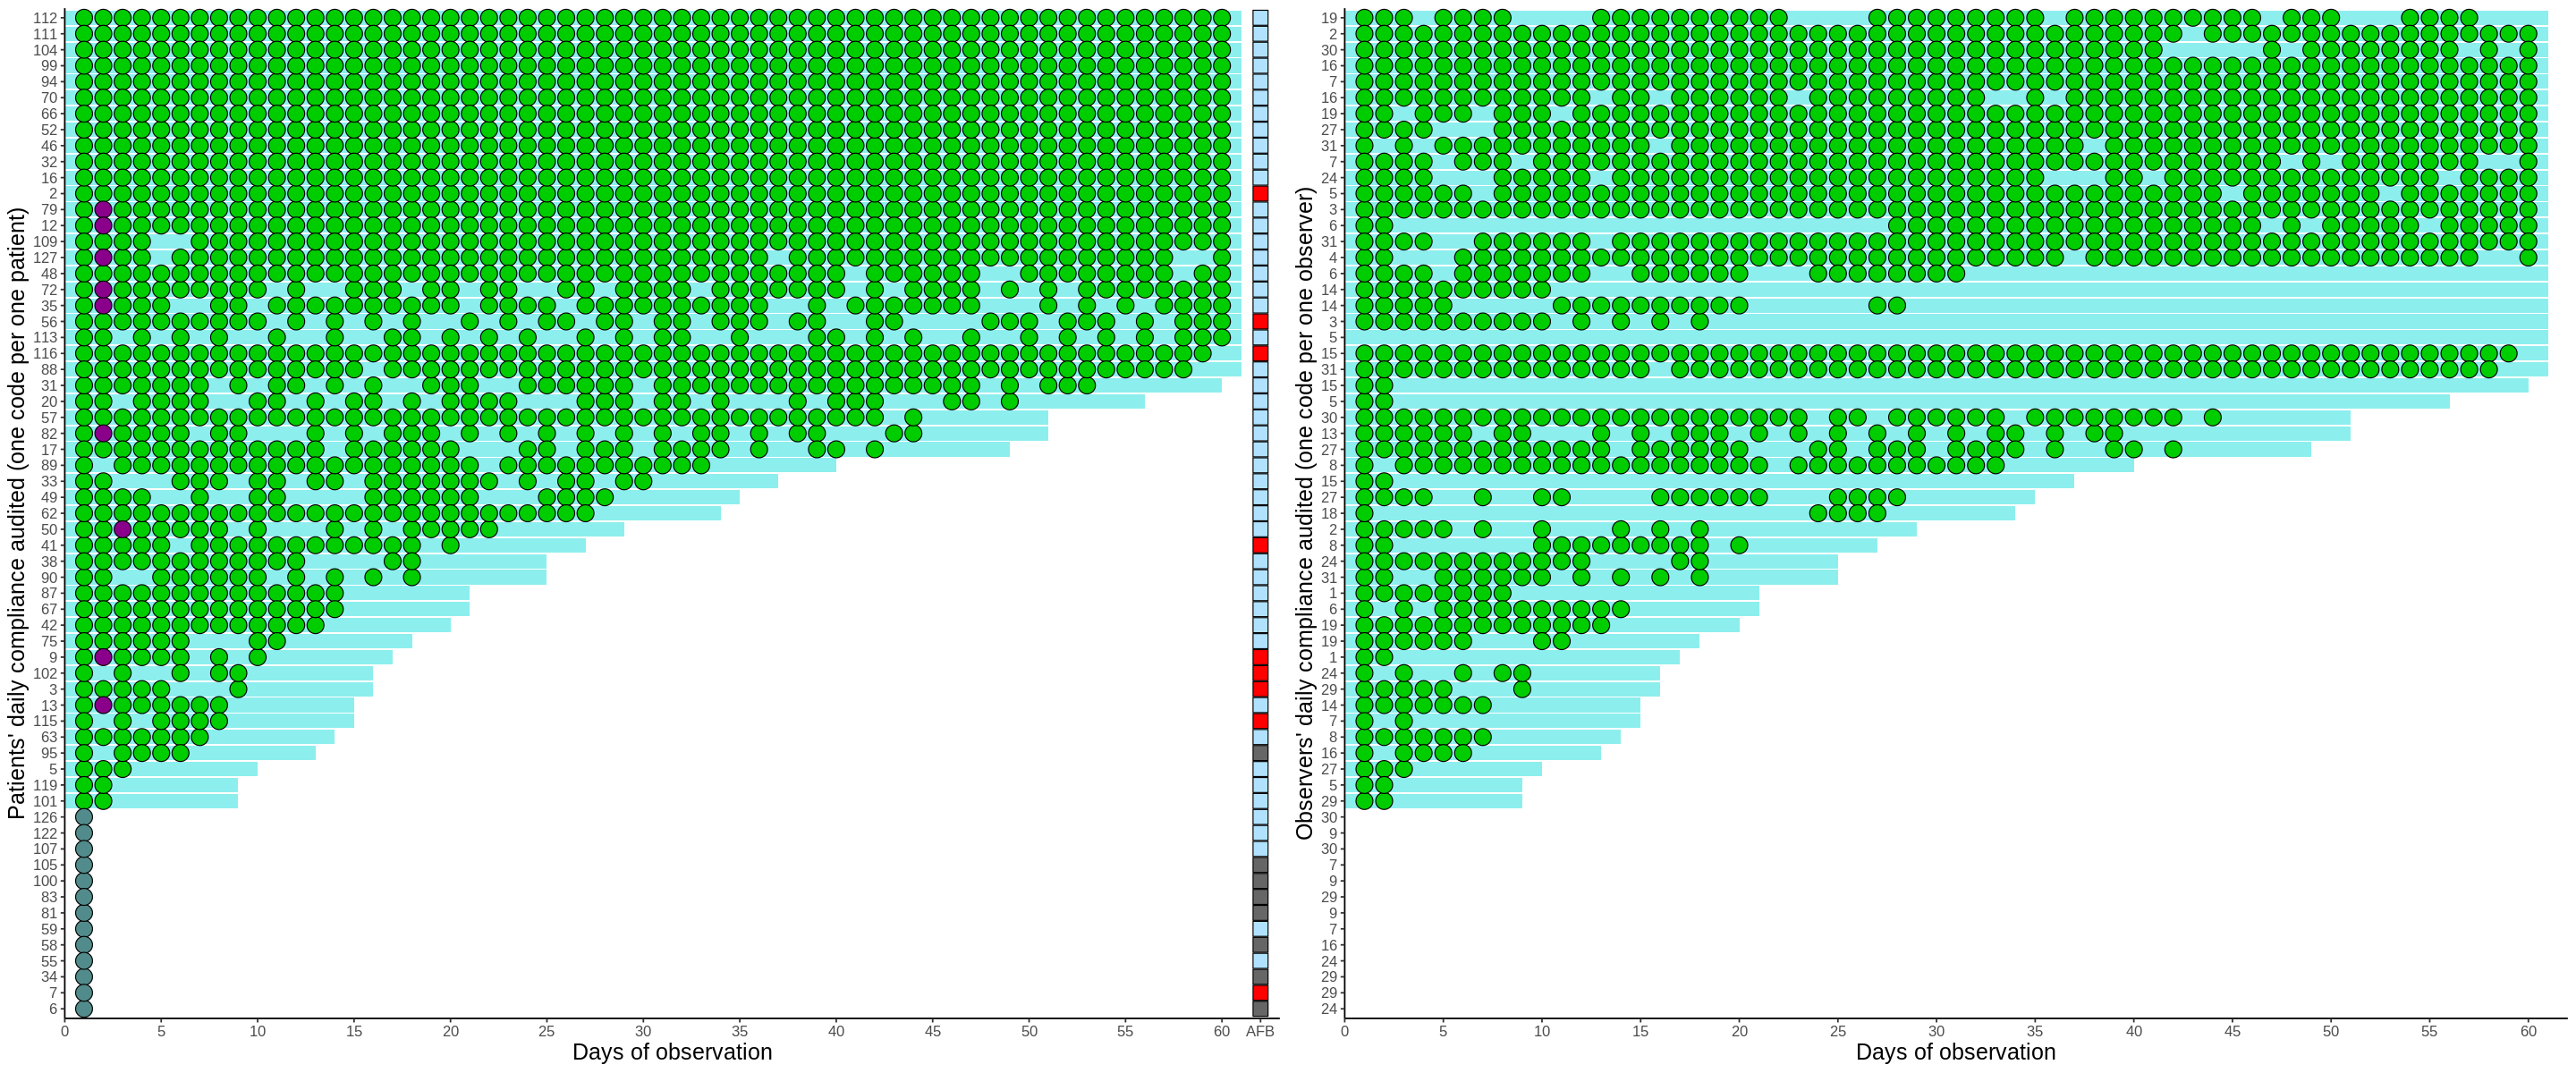

In [ ]:
ggarrange(fig_votpat, fig_votob,
          labels = c("", ""),
          ncol = 2, nrow = 1)

# **DOT**

Import data refusal of DOT

In [ ]:
temp <- tempfile()
download.file("https://drive.usercontent.google.com/uc?id=1dfryohZORlV_qYX1naLuAGVQBWB8msOd&authuser=0&export=download", temp)
refuse_dot<-readRDS(temp)

Data manipulation for the patients

In [ ]:
longdot<-longpat[longpat$type=="dot",-2]
longdot<-longdot[longdot$session != 0,]
orddot<-longdot %>% group_by(no) %>% summarise(m=max(day[day!=62]),peak = sum(day[day!=62])) %>% mutate(m=ifelse(no==53,-1,m)) %>% arrange(m,peak)
longdot$no<-factor(longdot$no,levels = orddot$no)
longdot$session<-factor(longdot$session)

ag_longdot<-longdot[longdot$day != 62,] %>% group_by(no) %>% summarise(day = max(day))
ag_longdot$day[ag_longdot$day>=56]<-61
ag_longdot$day[ag_longdot$day<56]<-floor(ag_longdot$day[ag_longdot$day<56]/7+1)*7
ag_longdot$day[ag_longdot$no %in% refuse_dot$no]<-0
orddot$axis<-1:nrow(orddot)
ordobd<-merge(orddot,longpat[longpat$day==0,c("no","cluster")],by="no",all.x=TRUE)
ordobd<-ordobd %>% arrange(axis)
longdot<-longdot[longdot$day != 0,]

Visualization of patients' compliance days in the DOT group

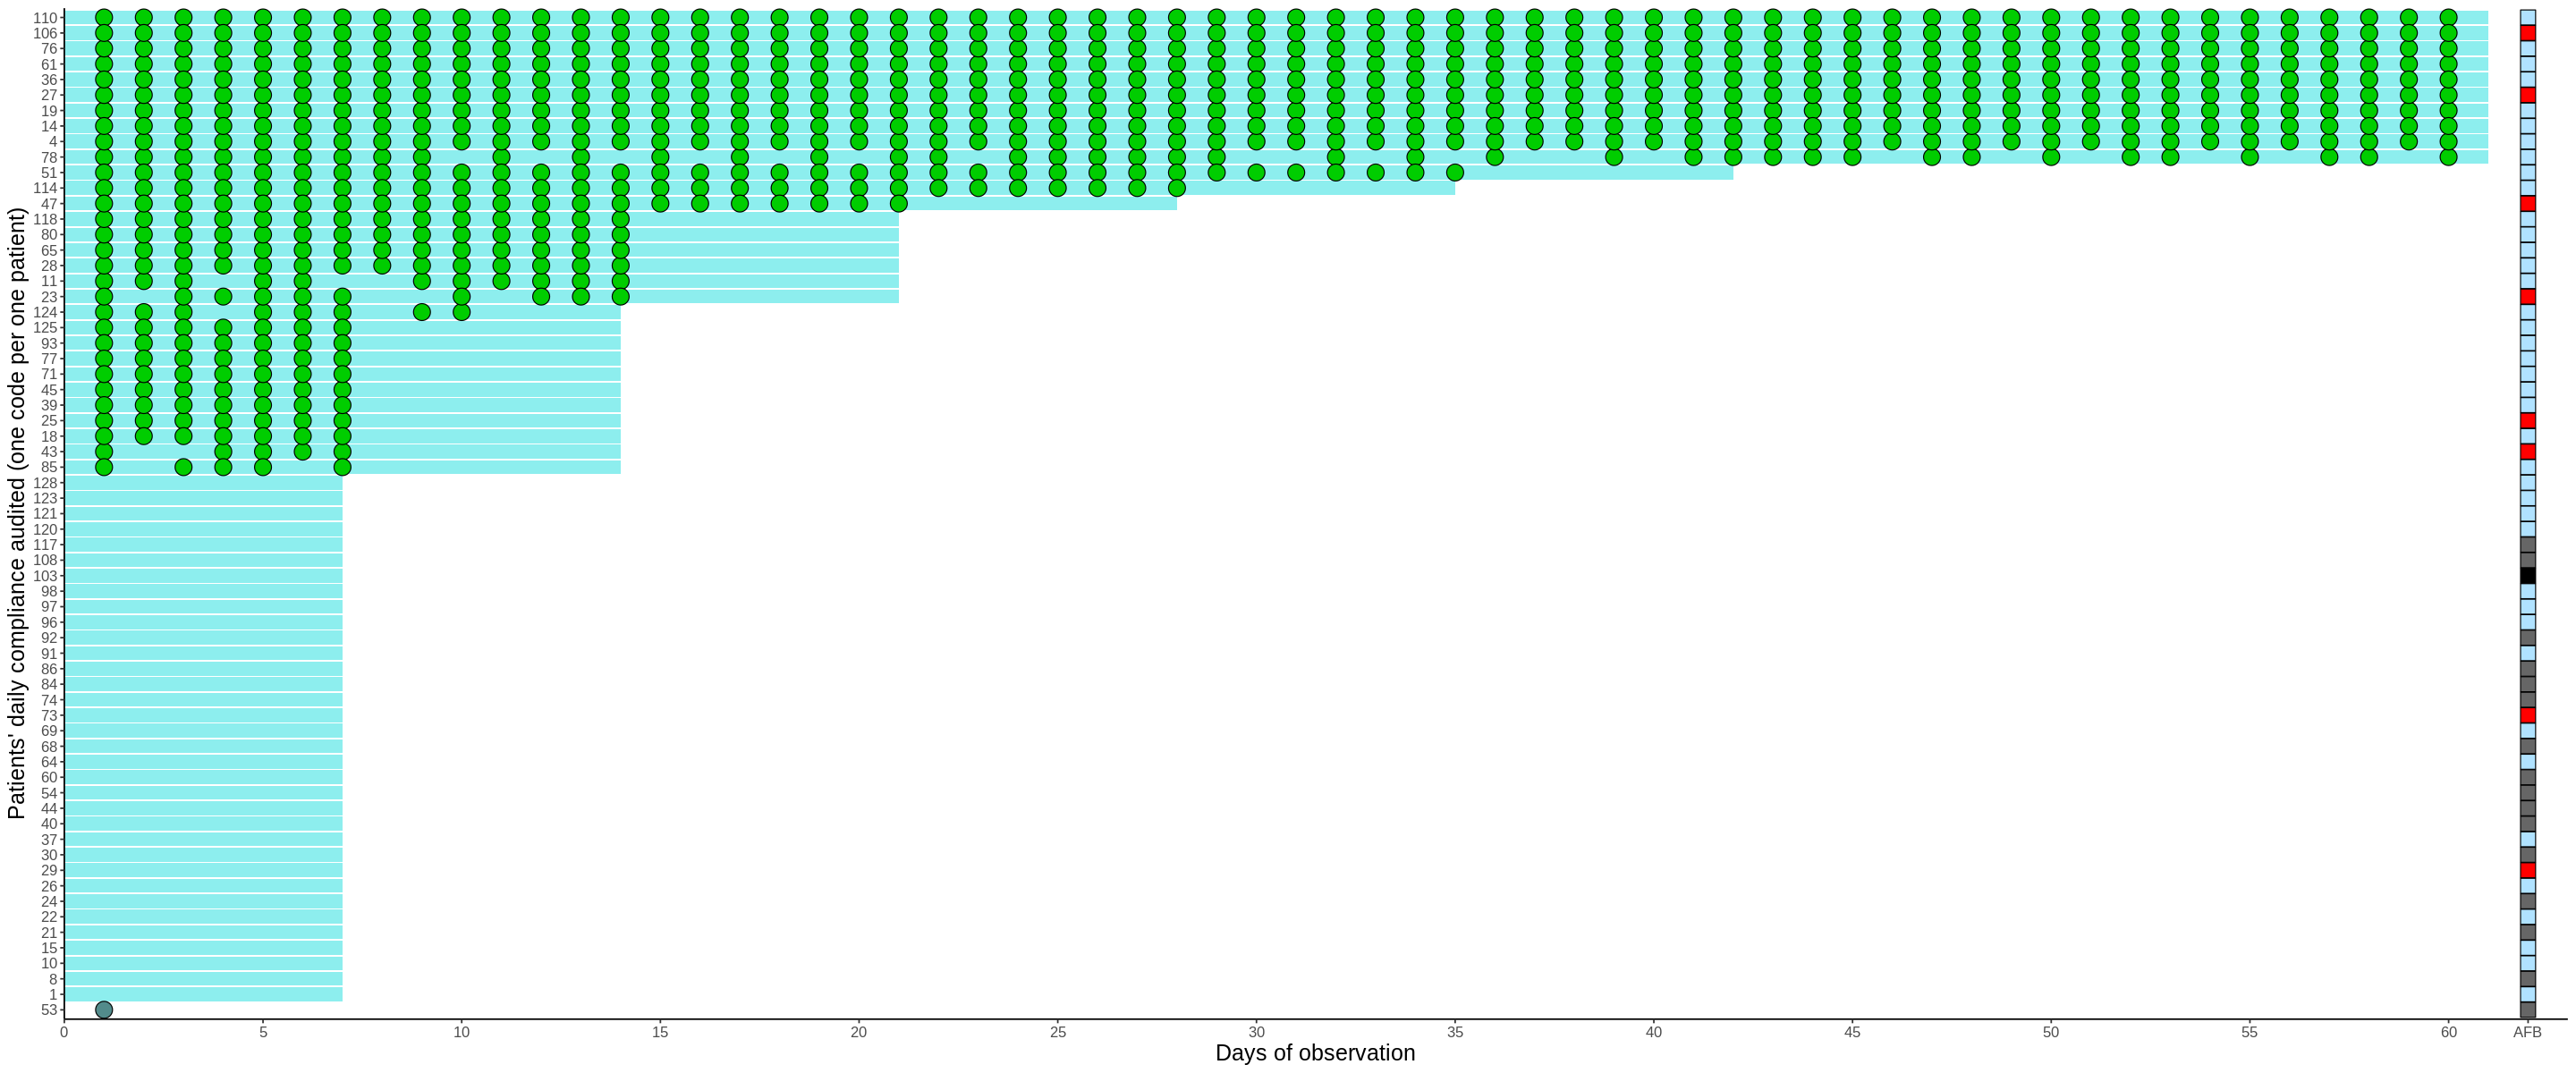

In [ ]:
fig_dotpat<-ggplot()+geom_bar(data=ag_longdot,aes(x=day,y=no),stat="identity",fill = "darkslategray2")+
  geom_point(data=longdot[longdot$day == 62,],aes(x=day,y=no,fill=session),colour="black",pch=22, size=5,show.legend = FALSE)+
  geom_point(data=longdot[longdot$day != 62,],aes(x=day,y=no,fill=session),
             colour="black",pch=21, size=5,show.legend = FALSE)+
  geom_point(data=refuse_dot,aes(x=day,y=no), fill="darkslategray4",
             colour="black",pch=21, size=5,show.legend = FALSE)+
  scale_x_continuous(breaks=c(0,5*1:12,62),labels = c(0,5*1:12,"AFB"),expand = c(0,0),limits = c(0,63))+
  scale_fill_manual(values = c("green3","lightskyblue1","red","grey40","black"))+
  xlab("Days of observation")+
  ylab("Patients' daily compliance audited (one code per one patient)")+
  theme_classic()+
  theme(axis.text.x = element_text(size=10),
        axis.text.y = element_text(size=10),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size=15))
fig_dotpat

Data manipulation for DOT observers

In [ ]:
longdotob<-as.data.table(longob[longob$type=="dot",-2])
longdotob$no<-factor(longdotob$no,levels = orddot$no)
longdotob<-longdotob[session!=0]
longdotob$session<-factor(longdotob$session)
longdotob<-longdotob[day!=0,]

Visualization of observers' compliance days in the DOT group

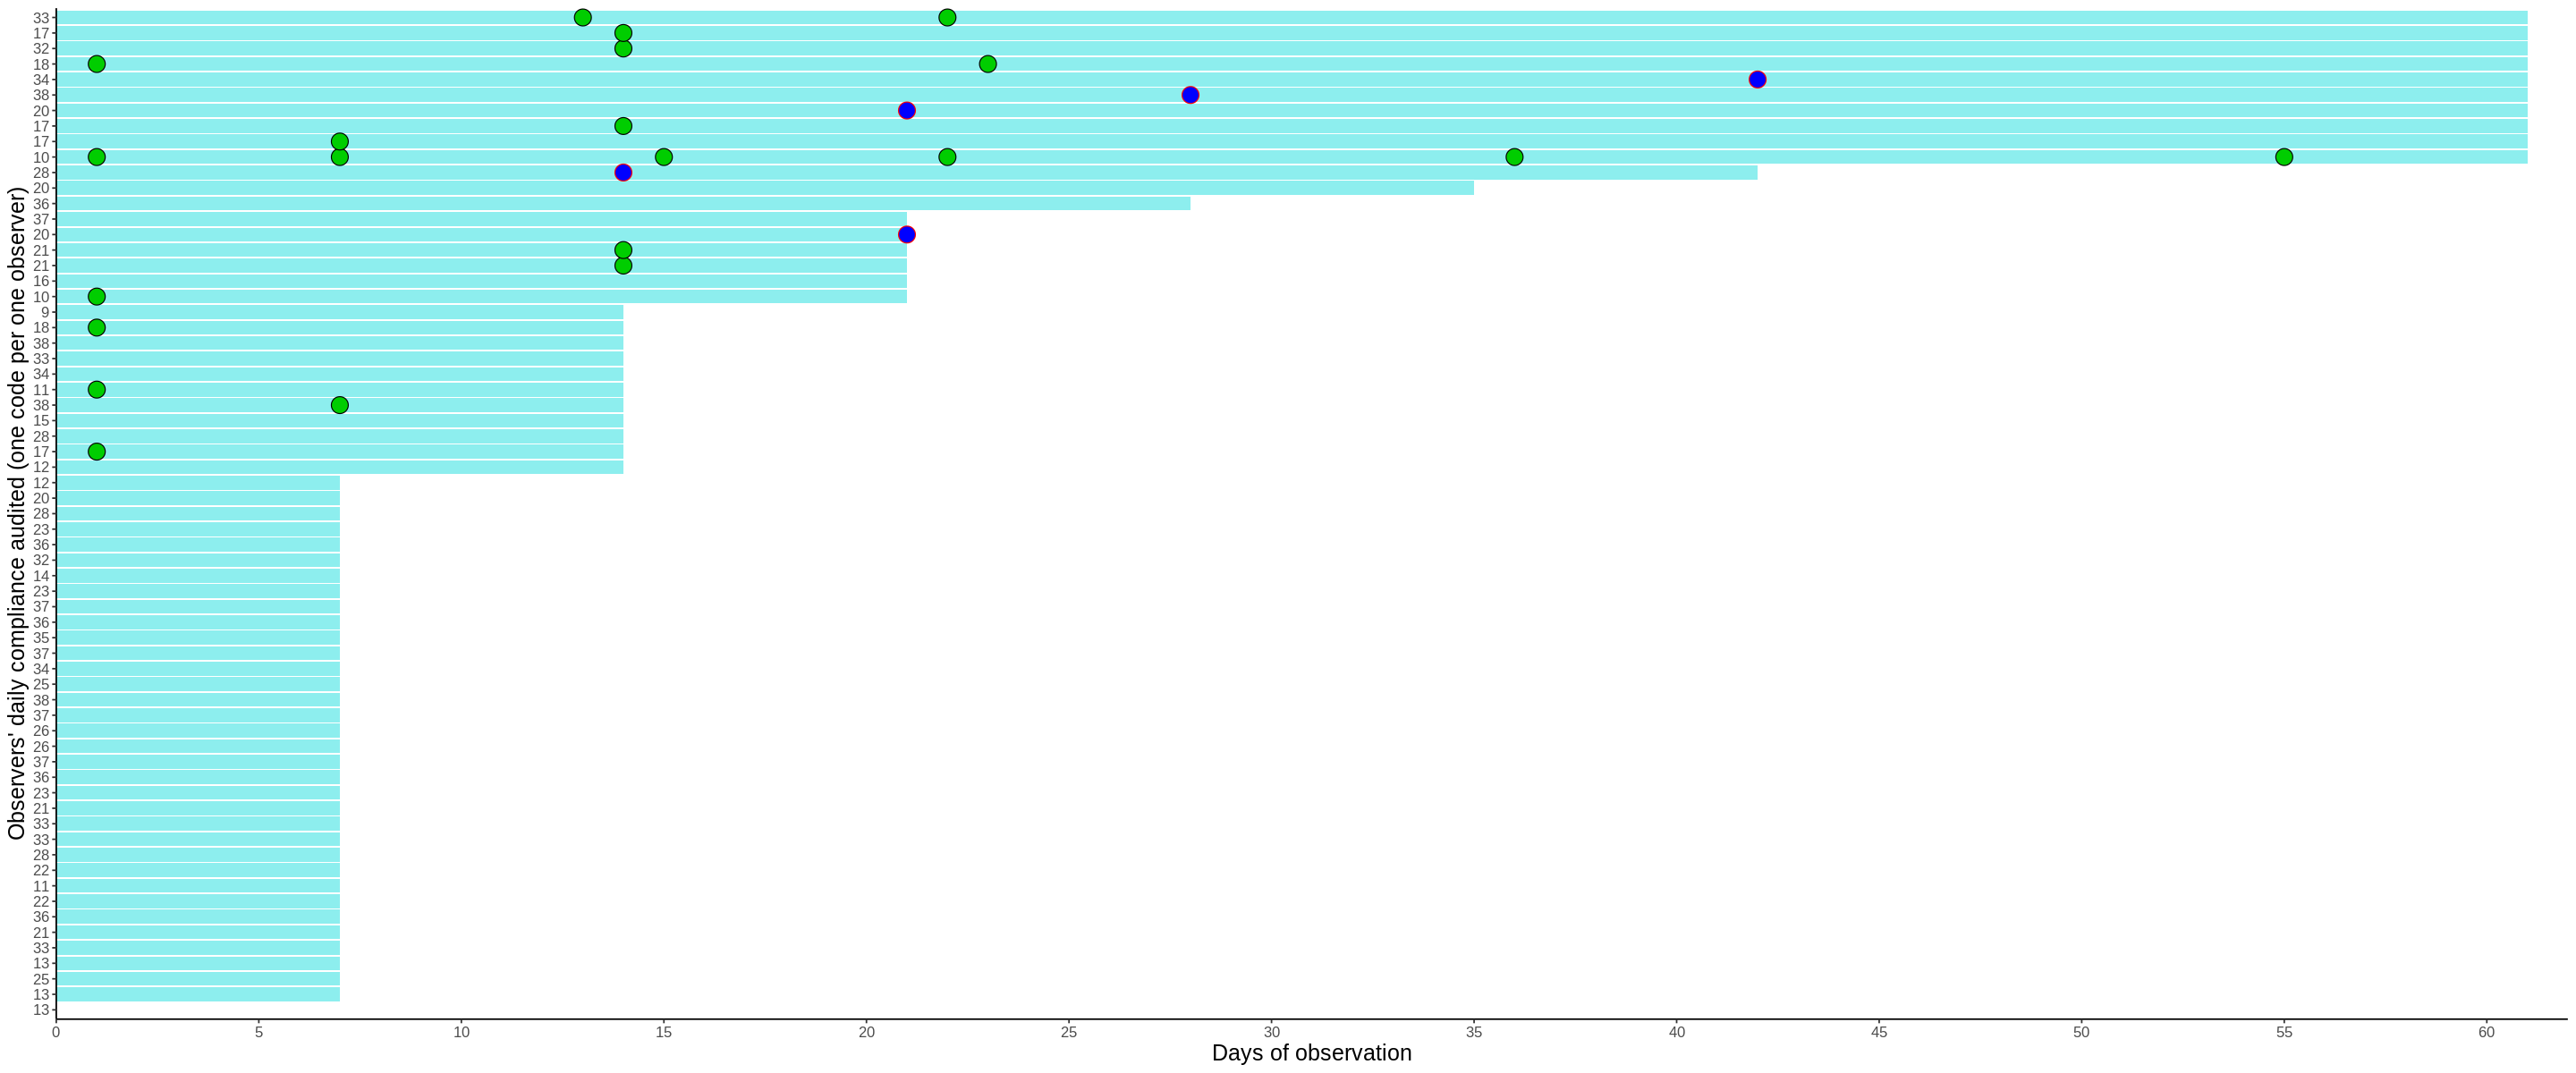

In [ ]:
fig_dotob<-ggplot()+
  geom_bar(data=ag_longdot,aes(x=day,y=no),stat="identity",fill = "darkslategray2")+
  geom_point(data=longdotob,aes(x=day,y=no,fill=factor(session),col=factor(session)),
                                             pch=21, size=5,show.legend = FALSE)+
  scale_x_continuous(breaks=c(0,5*1:12),labels = c(0,5*1:12),expand = c(0,0),limits = c(0,62))+
  scale_y_discrete(labels=ordobd$cluster)+
  scale_fill_manual(values = c("green3","blue"))+
  scale_colour_manual(values = c("black","red"))+
  xlab("Days of observation")+
  ylab("Observers' daily compliance audited (one code per one observer)")+
  theme_classic()+
  theme(axis.text.x = element_text(size=10),
        axis.text.y = element_text(size=10),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size=15))
fig_dotob

Combine visualization of patients’ and observers’ compliance days in DOT

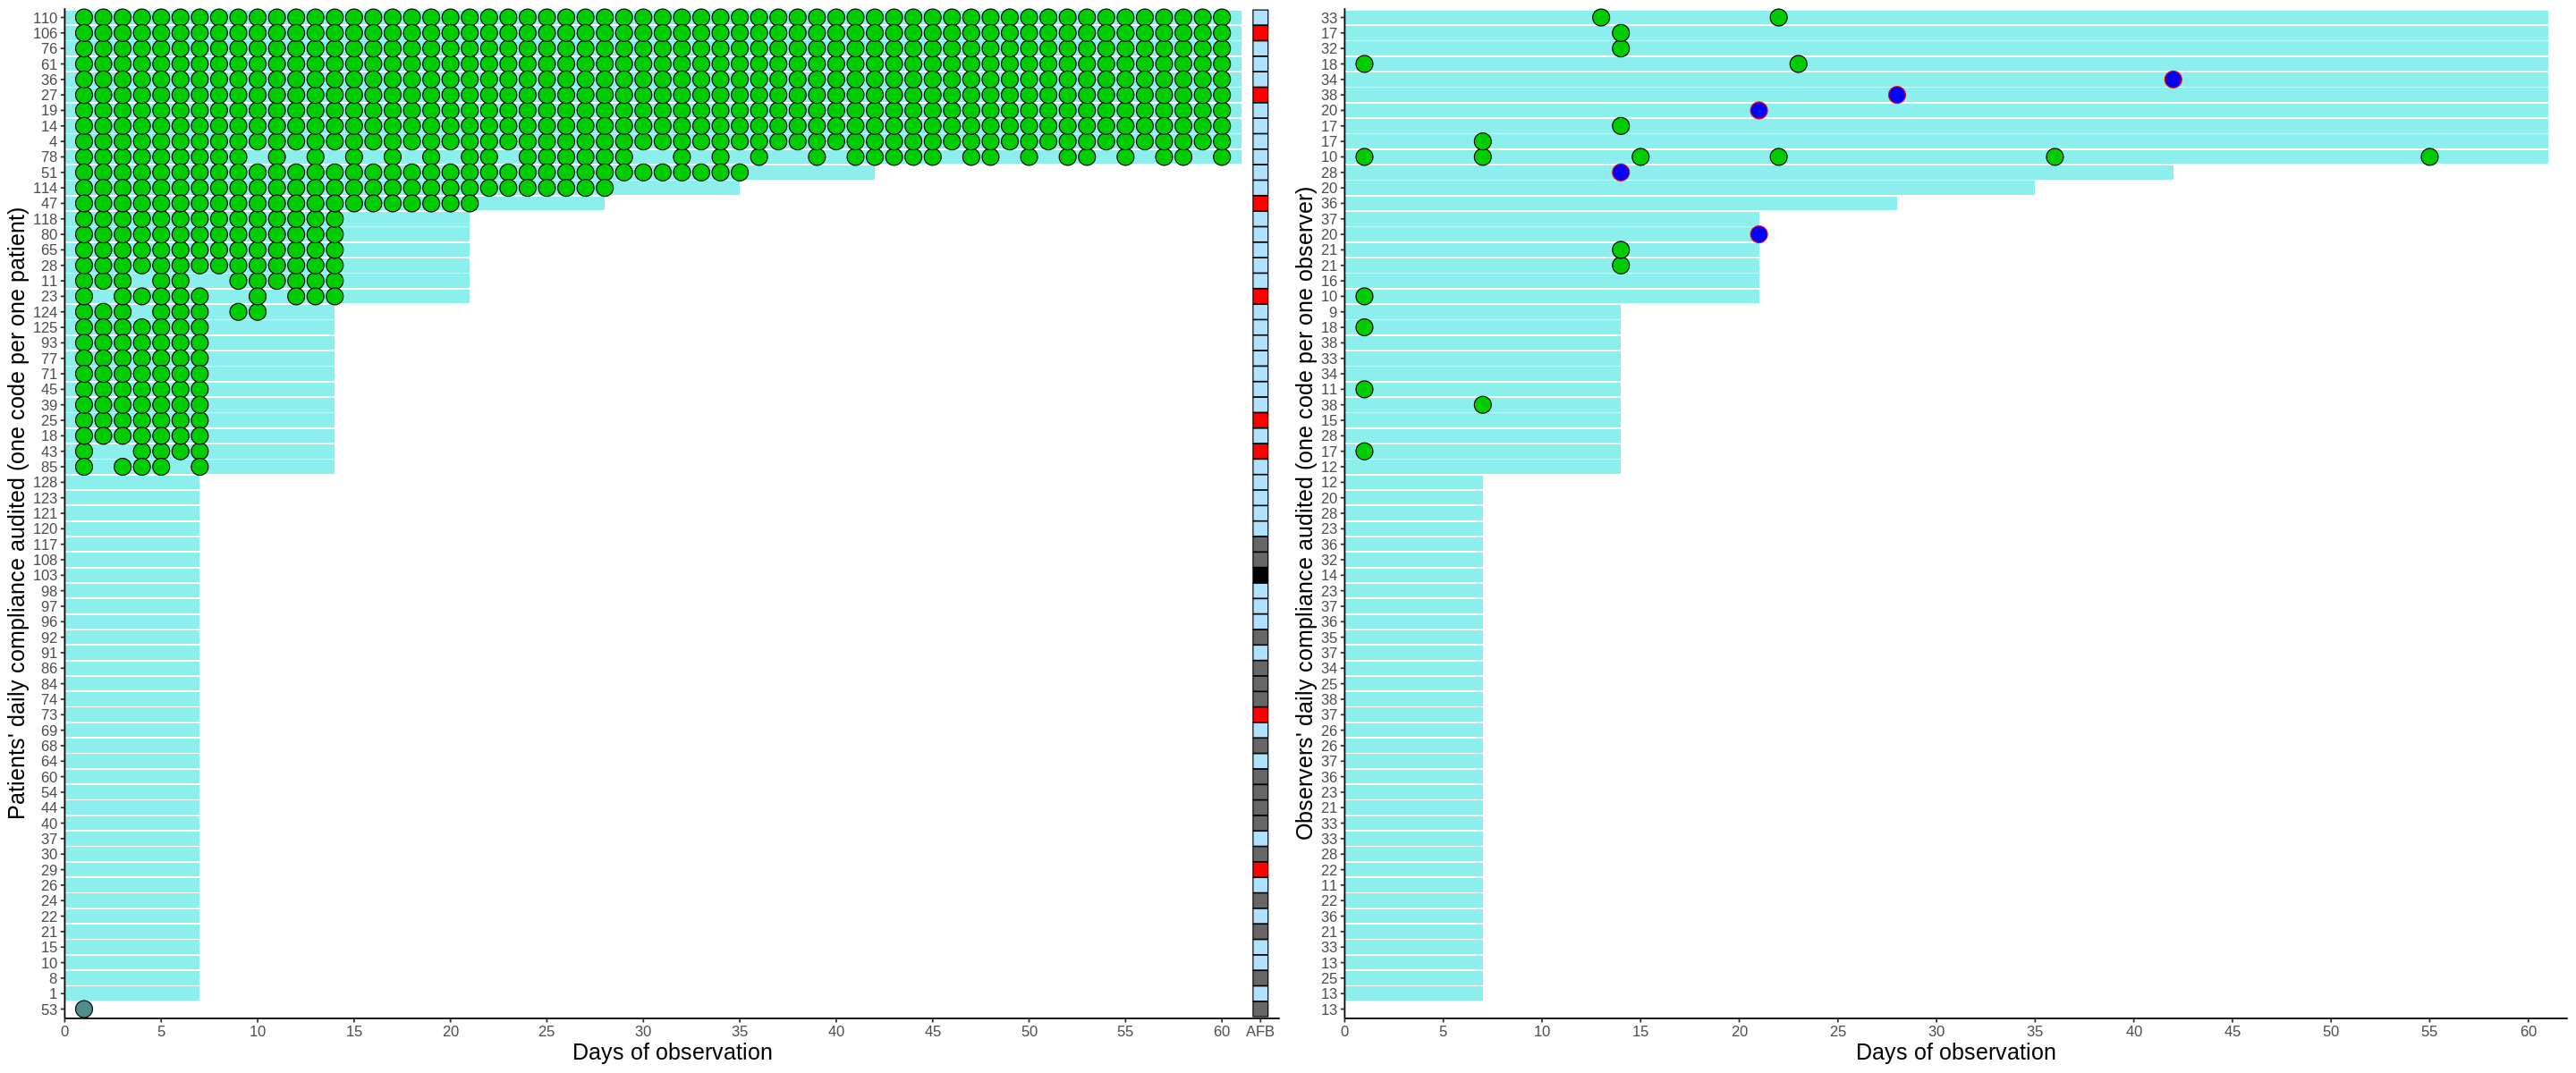

In [ ]:
ggarrange(fig_dotpat, fig_dotob,
          labels = c("", ""),
          ncol = 2, nrow = 1)

# **Analysis of primary data**

Import compliance data of the patients

In [ ]:
temp <- tempfile()
download.file("https://drive.usercontent.google.com/uc?id=19wmb6F_5Cc0EzZfLL5_g0dP0106aPaHv&authuser=0&export=download", temp)
longcpat<-as.data.table(readRDS(temp))

Import compliance data of the observers

In [ ]:
temp <- tempfile()
download.file("https://drive.usercontent.google.com/uc?id=1Hu_ErP6f8Uq2javEjw_P4jdJcrYZwerb&authuser=0&export=download", temp)
longcob<-as.data.table(readRDS(temp))

Calculate compliance days between groups taking cluster into account

In [ ]:
cp_mod <- lmer(com ~ type + (type | cluster), longcpat)

com_coef_votpat <- round(fixef(cp_mod)[2]+fixef(cp_mod)[1],1)
com_se_votpat <- round(sqrt(diag(vcov(cp_mod)))[2],1)

com_coef_dotpat <- round(fixef(cp_mod)[1],1)
com_se_dotpat <- round(sqrt(diag(vcov(cp_mod)))[1],1)

co_mod <- lmer(com ~ type + (type | cluster), longcob)

com_coef_votob <- round(fixef(co_mod)[2]+fixef(co_mod)[1],1)
com_se_votob <- round(sqrt(diag(vcov(co_mod)))[2],1)

com_coef_dotob <- round(fixef(co_mod)[1],1)
com_se_dotob <- round(sqrt(diag(vcov(co_mod)))[1],1)

## **Normality test**

In [ ]:
options(repr.plot.width=20, repr.plot.height=11)

**Patient compliance rate**

In [ ]:
longcpat2<-longcpat
longcpat2$cc<-predict(cp_mod)

In [ ]:
dx_model_pat<-lm(cc~type,data=longcpat2)

VOT

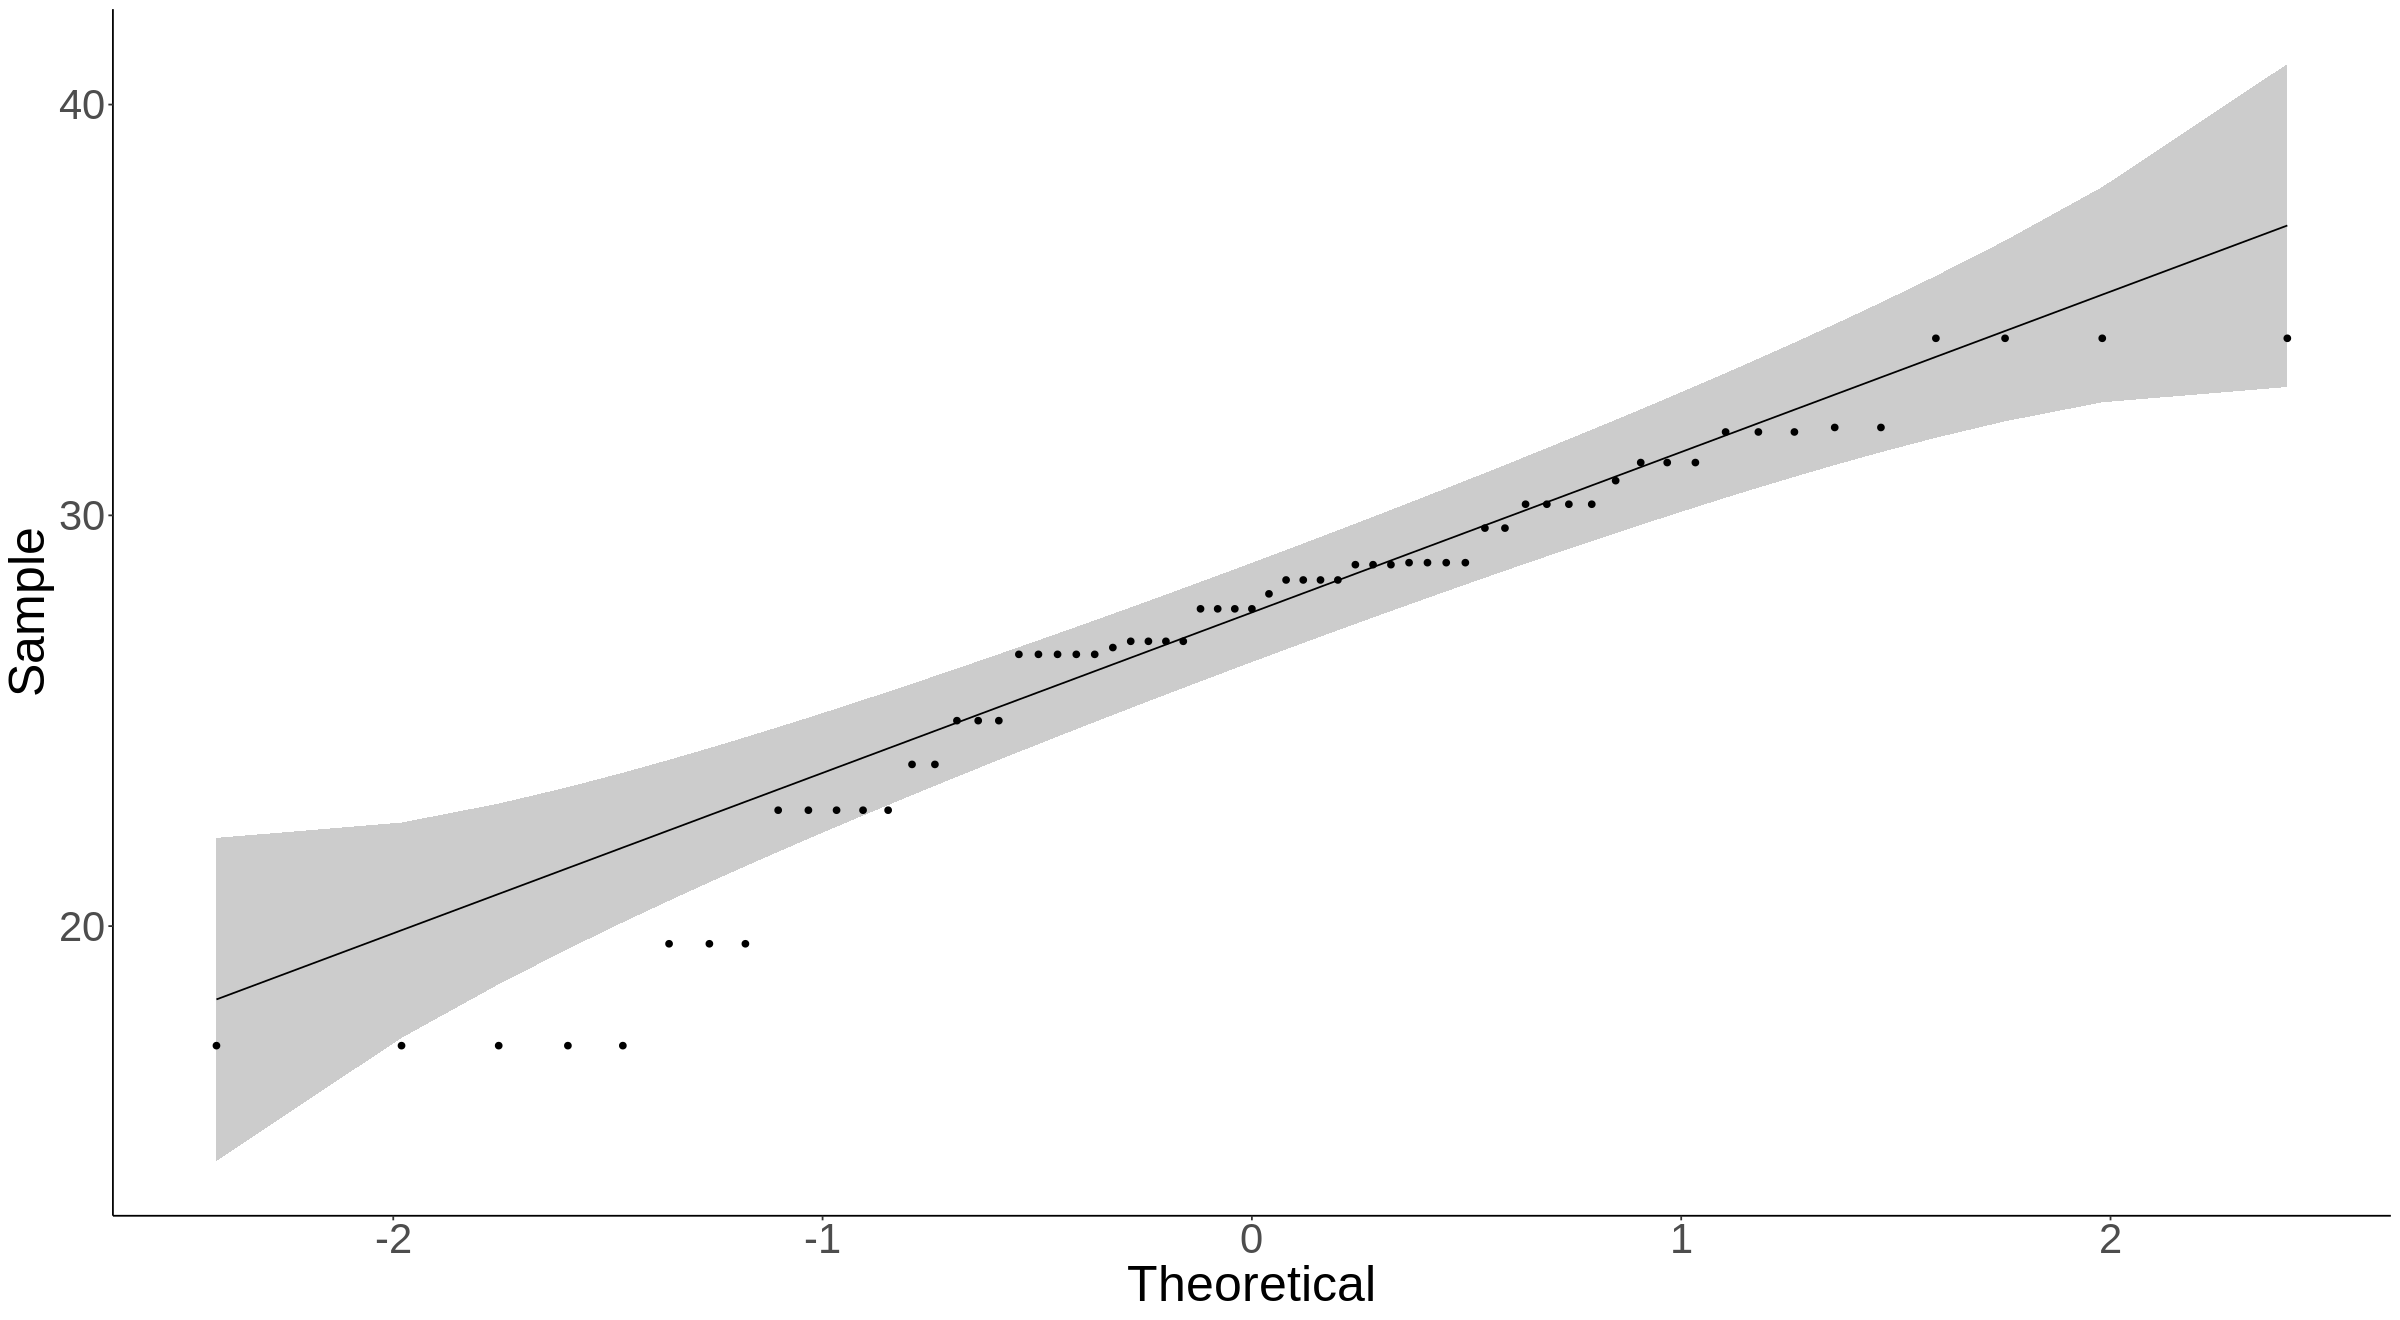

In [ ]:
ggqqplot(longcpat2$cc[longcpat2$type==TRUE])+
            theme_classic()+
  theme(axis.text.x = element_text(size=25),
        axis.text.y = element_text(size=25),
        axis.title.x = element_text(size=30),
        axis.title.y = element_text(size=30))

DOT

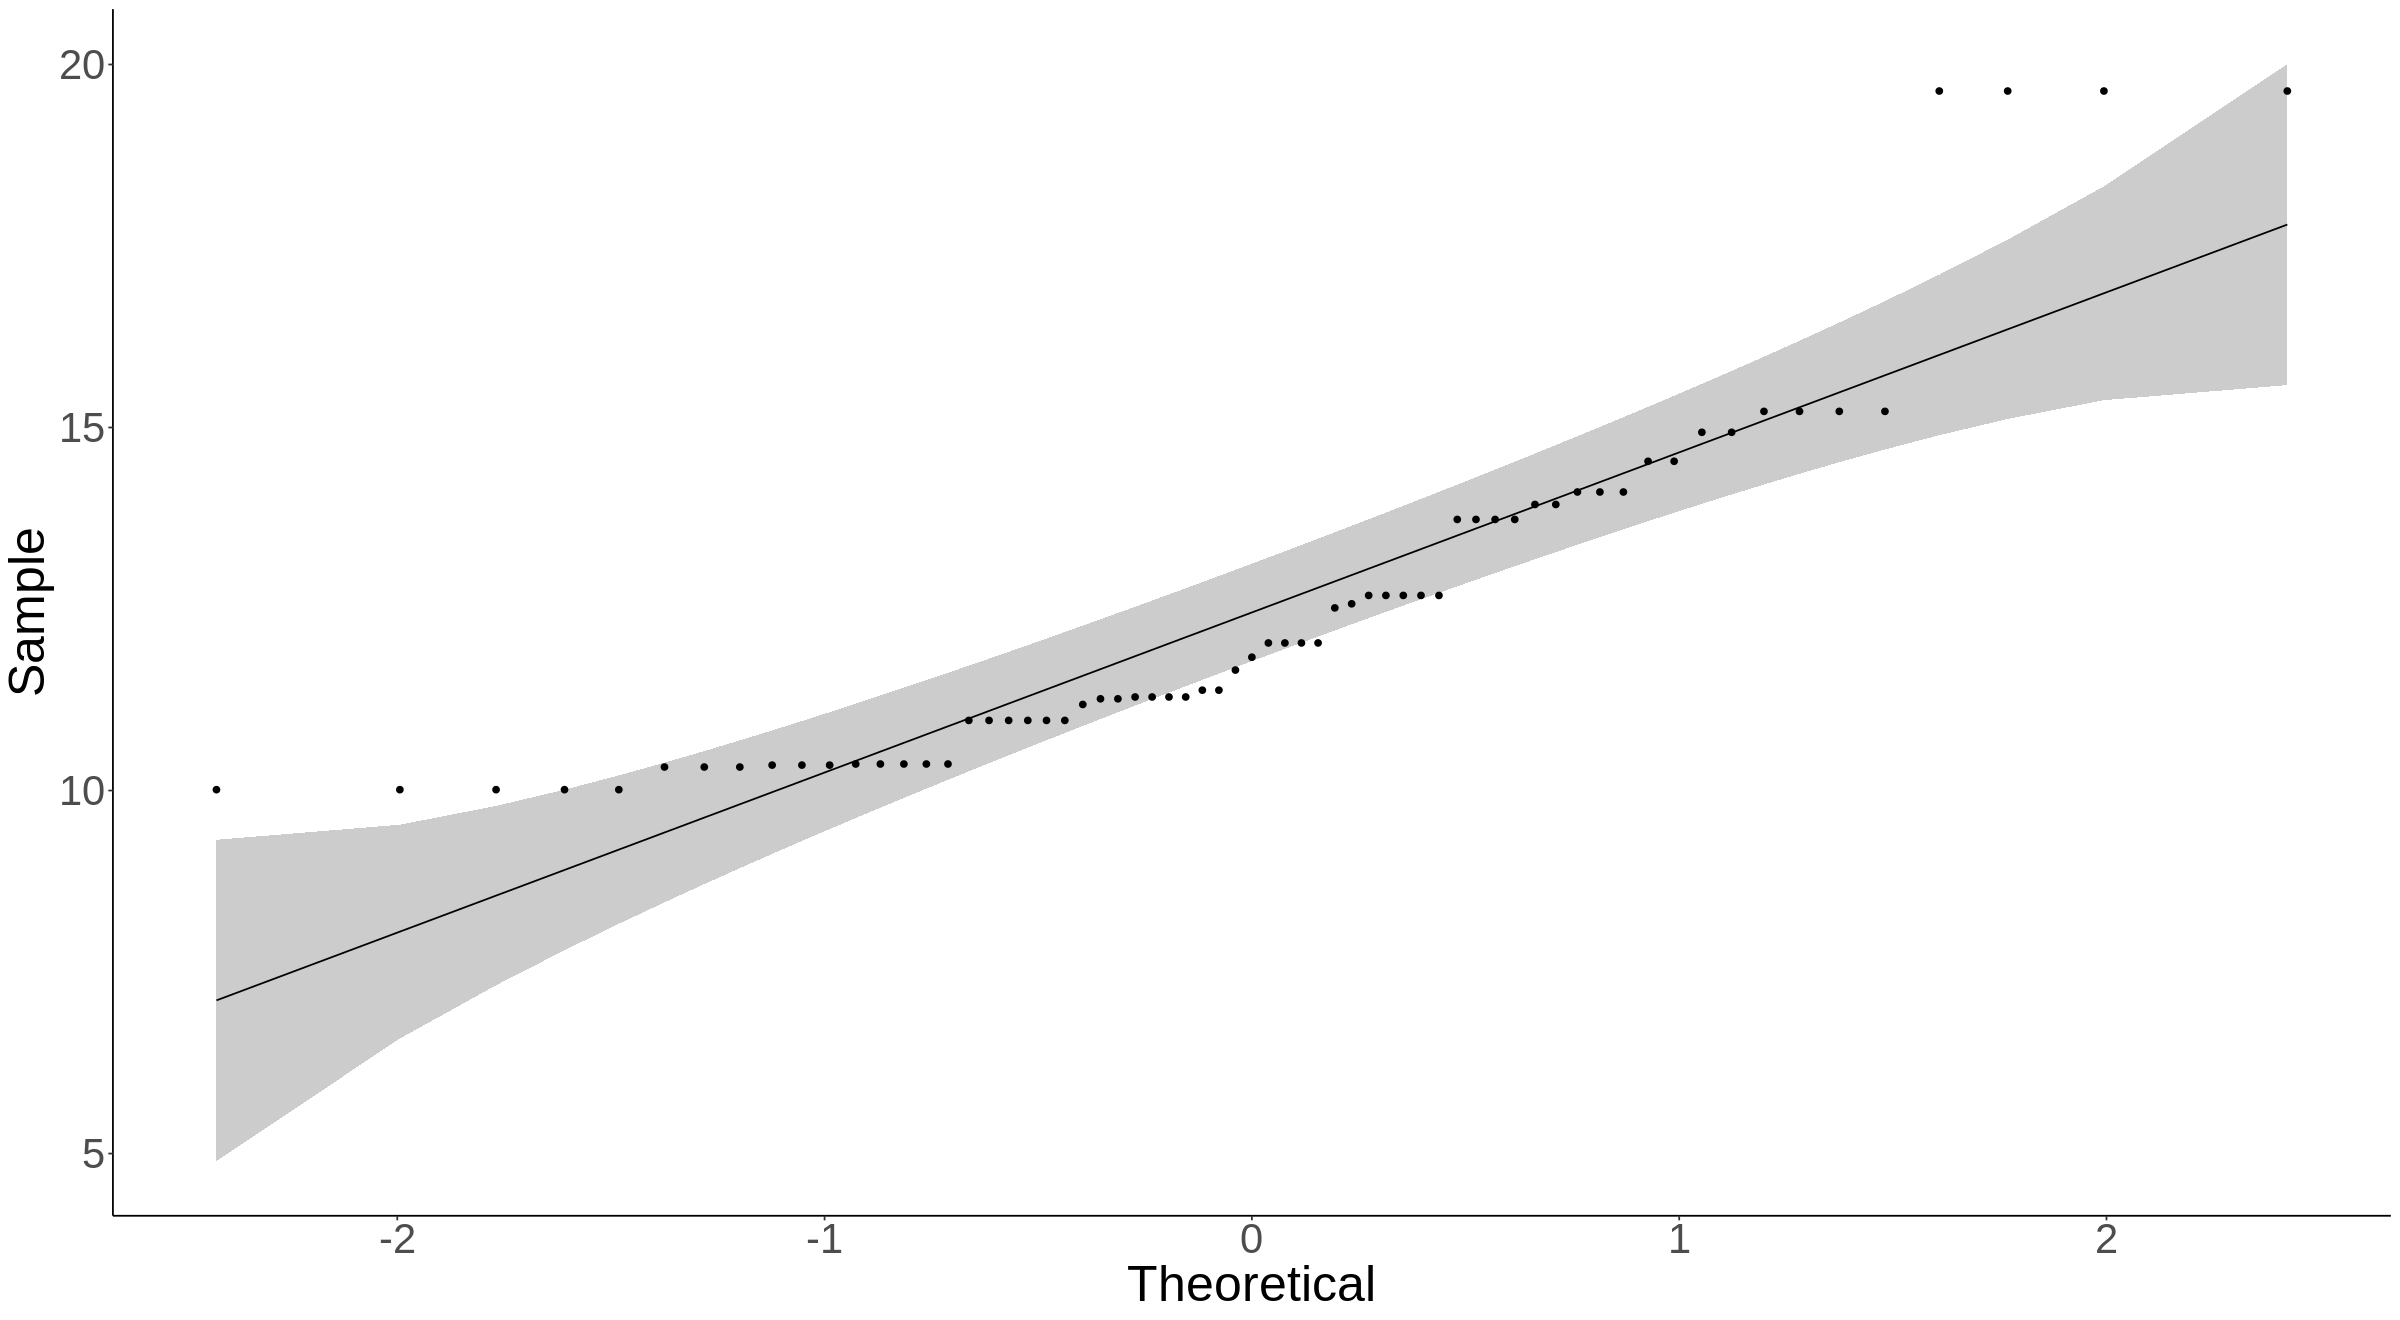

In [ ]:
ggqqplot(longcpat2$cc[longcpat2$type==FALSE])+
            theme_classic()+
  theme(axis.text.x = element_text(size=25),
        axis.text.y = element_text(size=25),
        axis.title.x = element_text(size=30),
        axis.title.y = element_text(size=30))

**Observer compliance rate**

In [ ]:
longcob2<-longcob
longcob2$cc<-predict(co_mod)

In [ ]:
dx_model_ob<-lm(cc~type,data=longcob2)

VOT

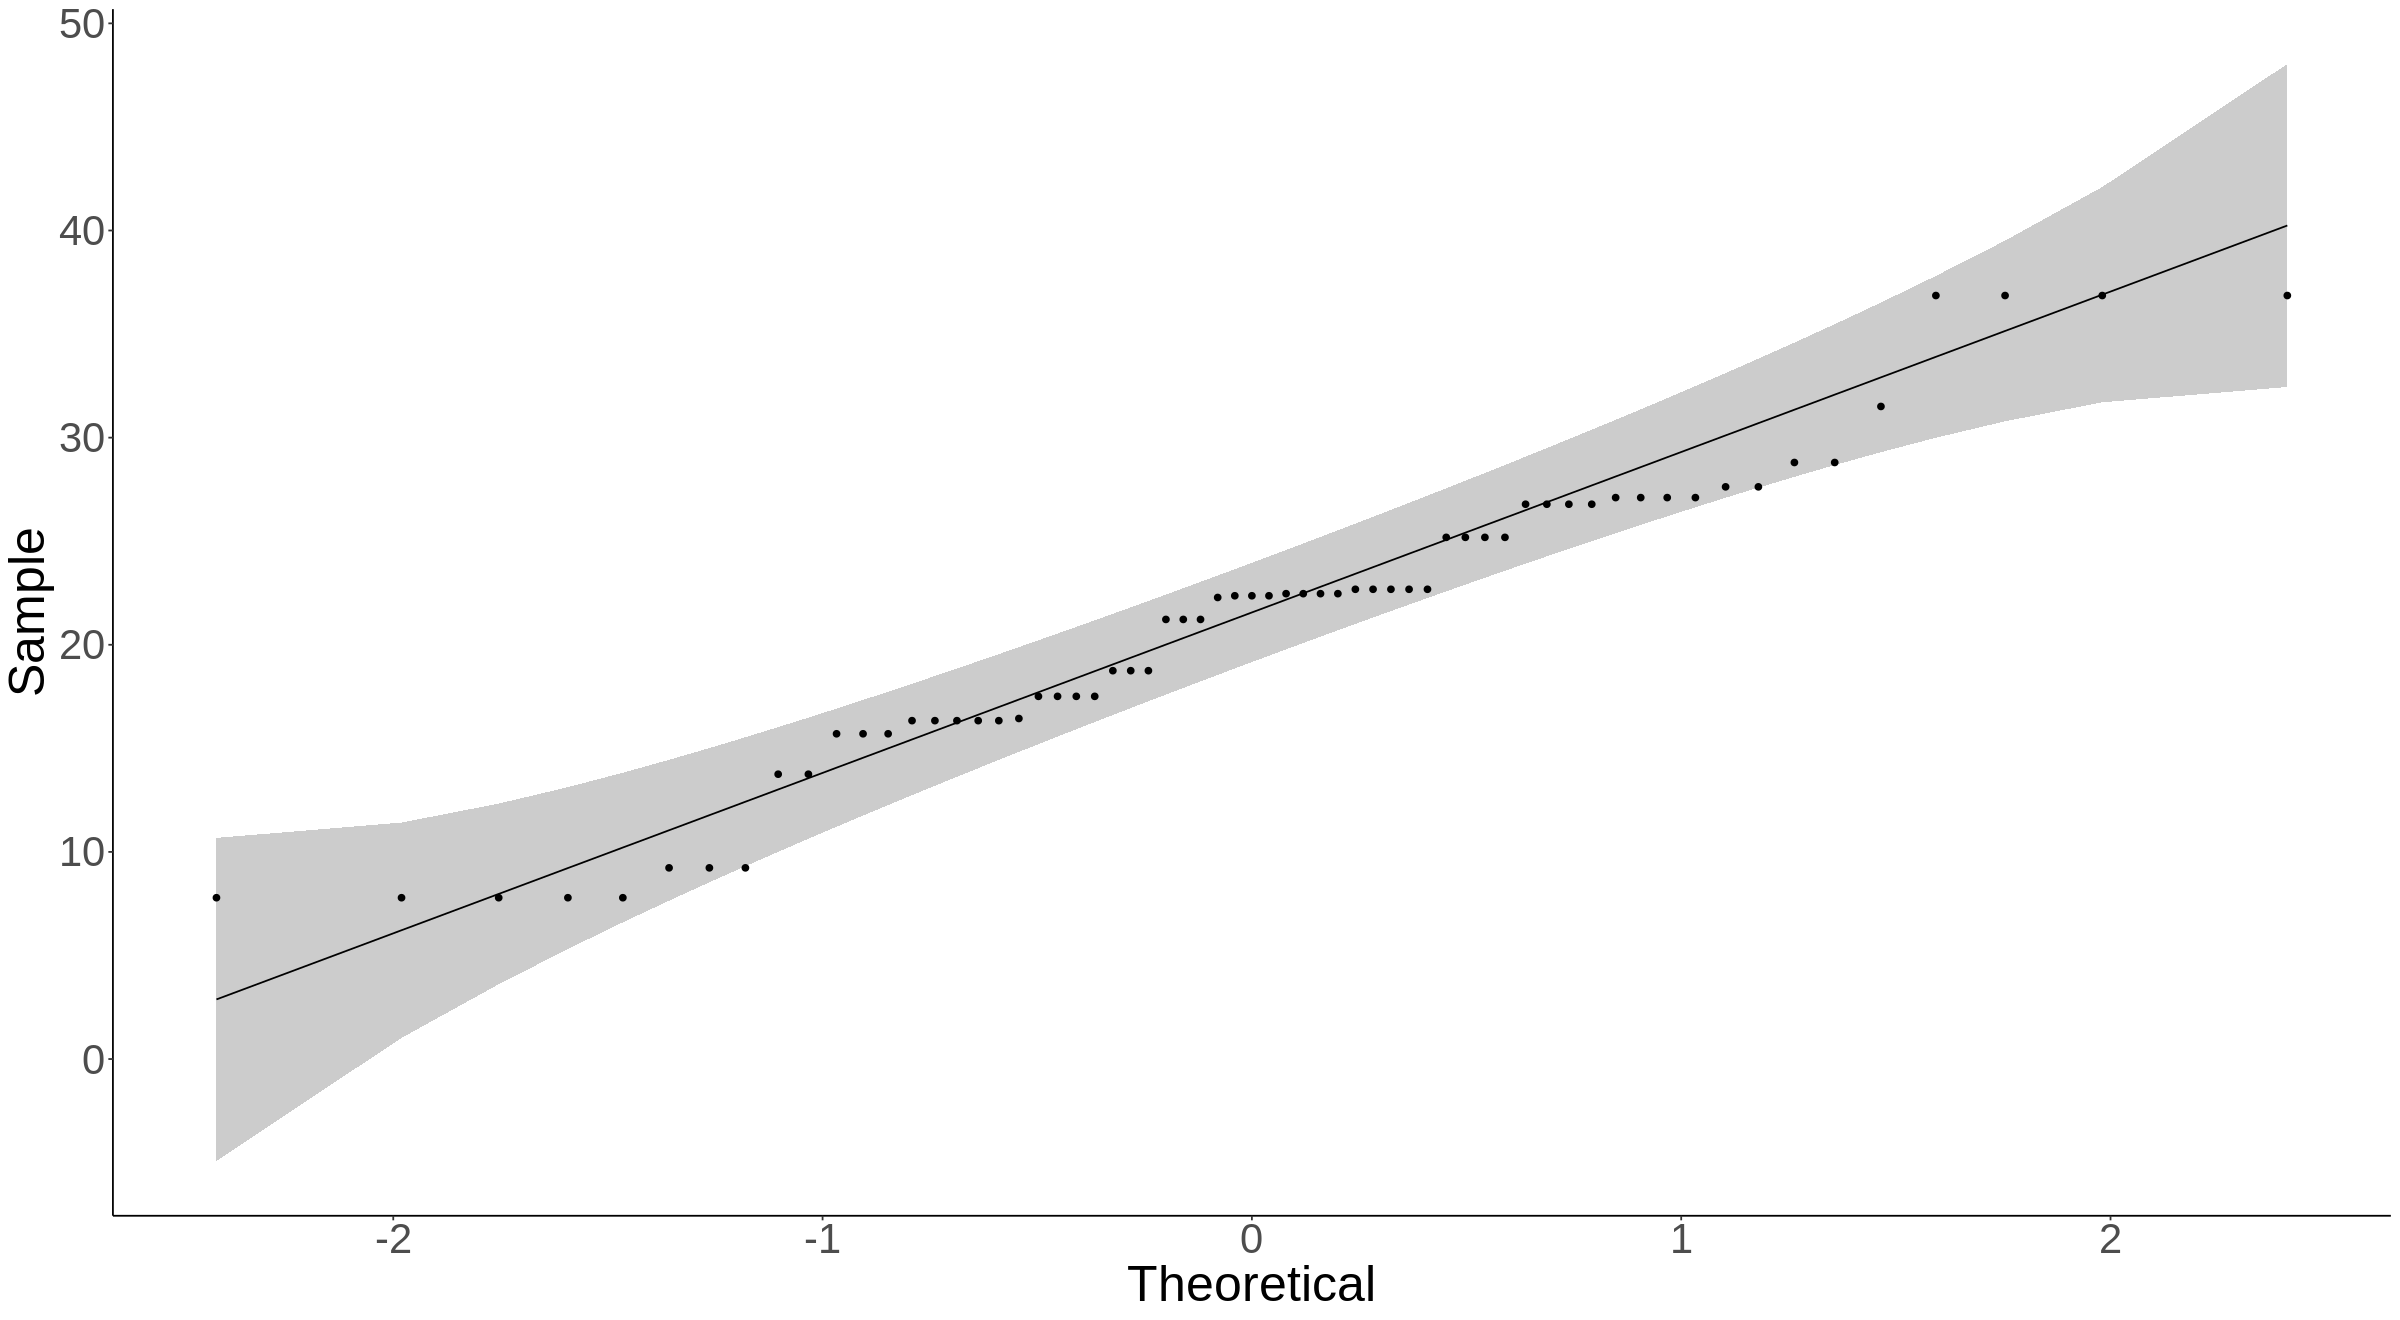

In [ ]:
ggqqplot(longcob2$cc[longcob2$type==TRUE])+
            theme_classic()+
  theme(axis.text.x = element_text(size=25),
        axis.text.y = element_text(size=25),
        axis.title.x = element_text(size=30),
        axis.title.y = element_text(size=30))

DOT

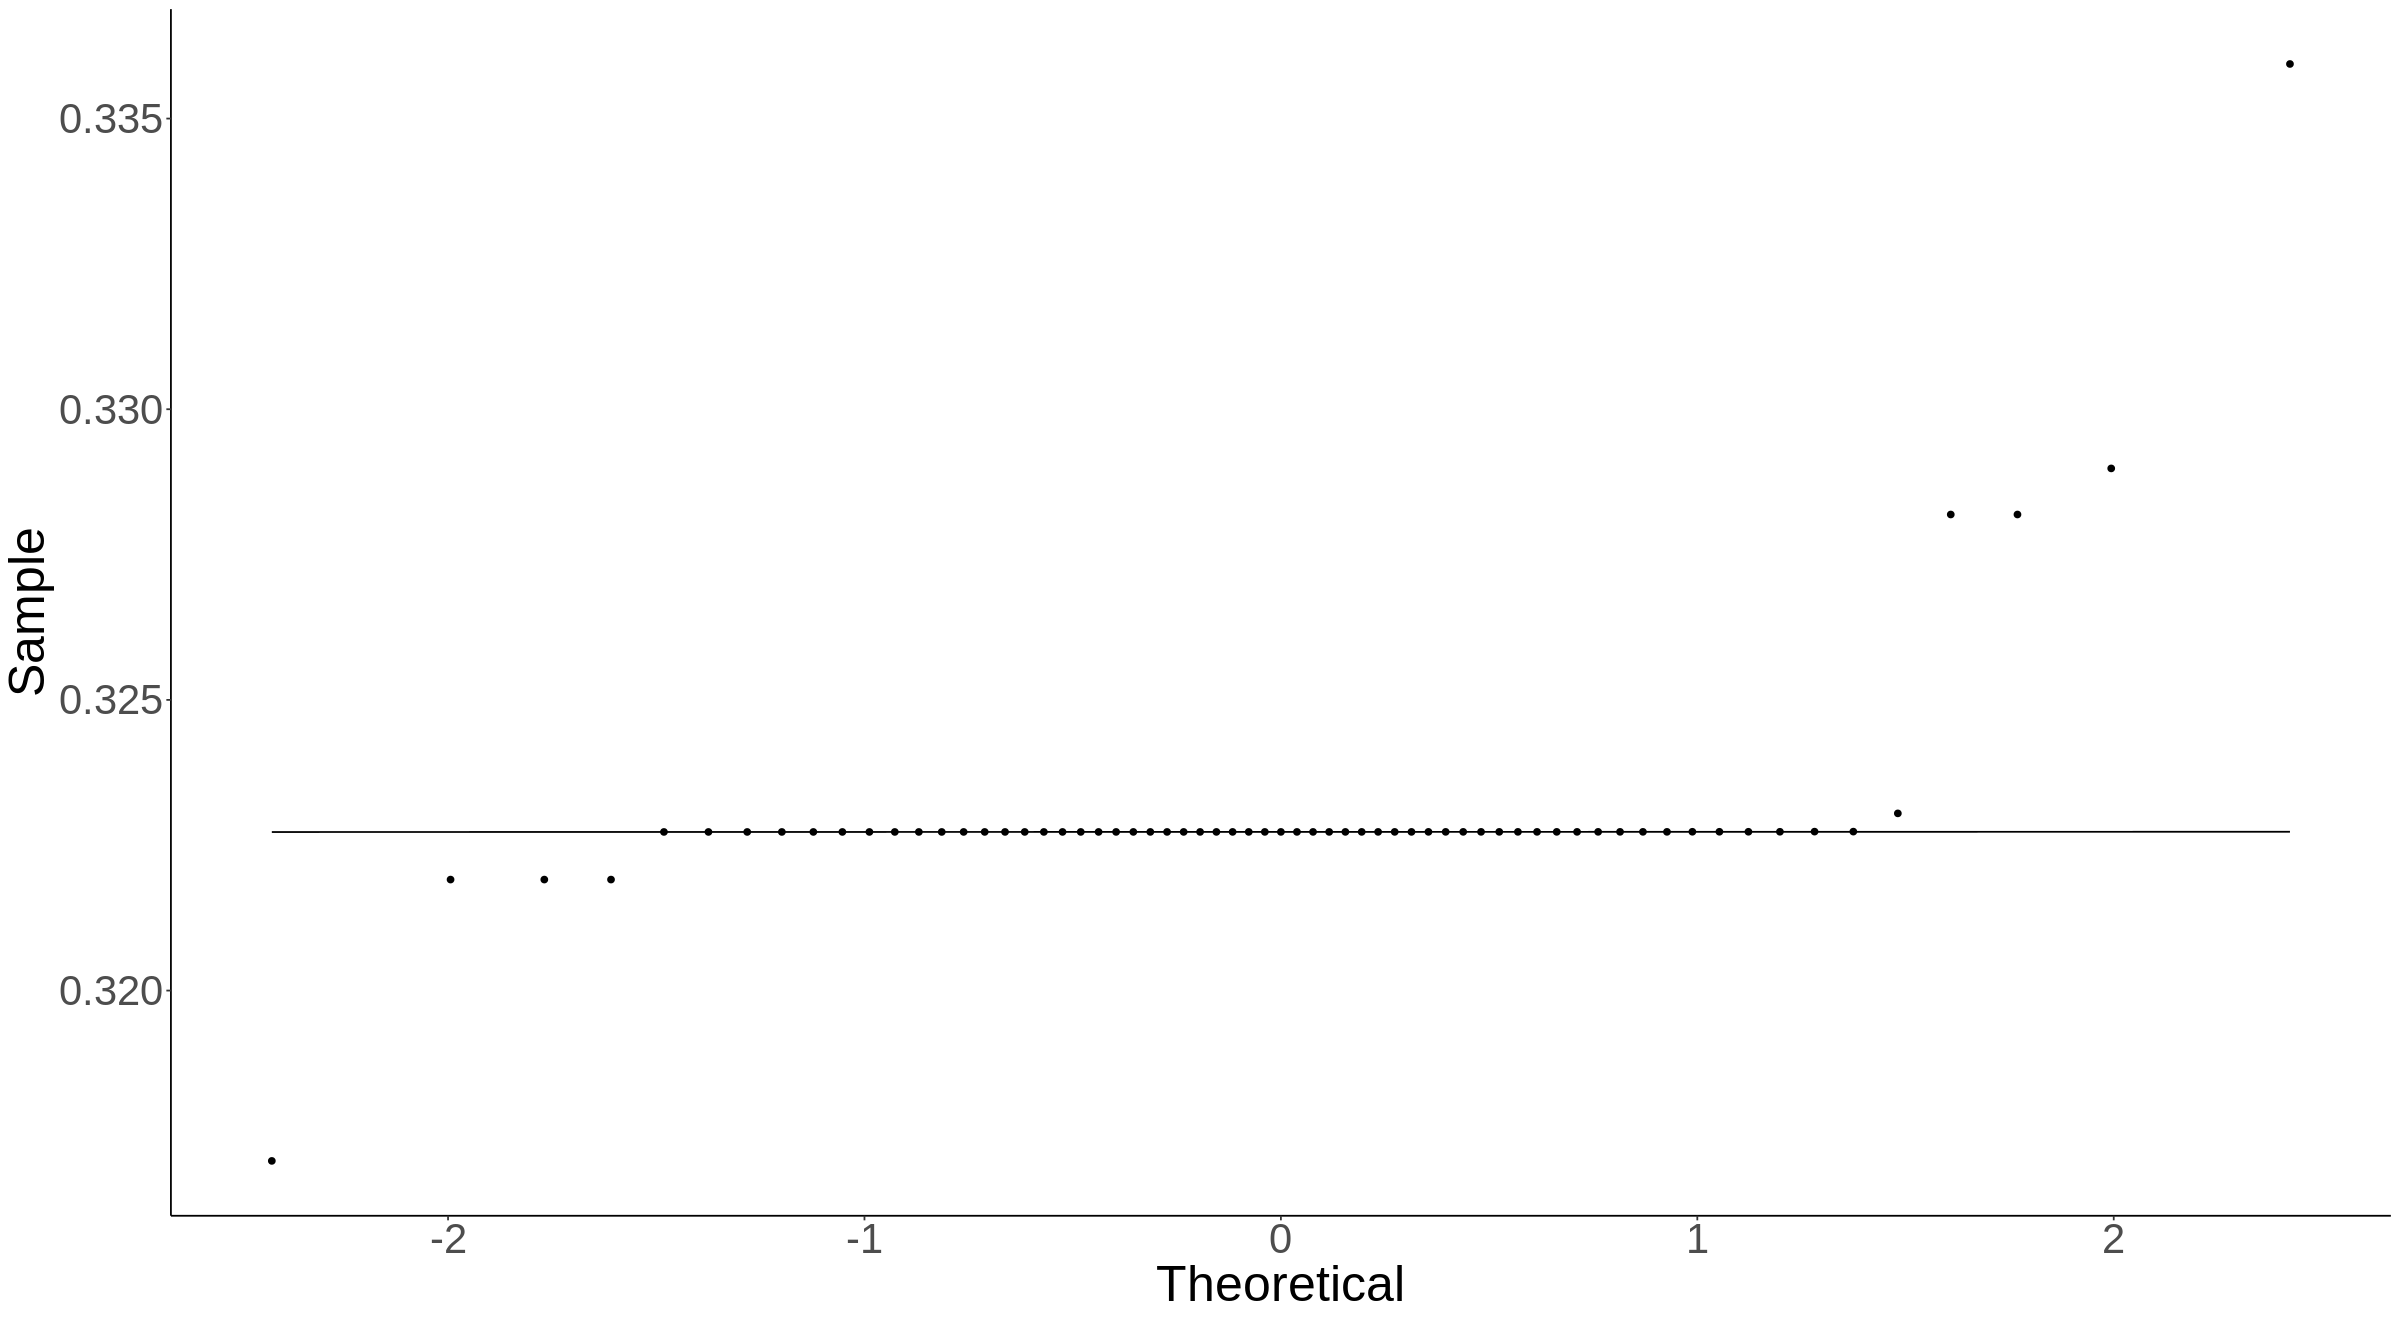

In [ ]:
ggqqplot(longcob2$cc[longcob2$type==FALSE])+
            theme_classic()+
  theme(axis.text.x = element_text(size=25),
        axis.text.y = element_text(size=25),
        axis.title.x = element_text(size=30),
        axis.title.y = element_text(size=30))

## **Homoscedasticity test**

Patients in VOT vs DOT

In [ ]:
ncvTest(dx_model_pat)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 19.73404, Df = 1, p = 8.9002e-06

Observers in VOT vs DOT

In [ ]:
ncvTest(dx_model_ob)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 66.03172, Df = 1, p = 4.4372e-16

**Welch's t-test**

P value for the patients

In [ ]:
# Means and Standard Errors
mean1 <- com_coef_votpat
se1 <- com_se_votpat
mean2 <- com_coef_dotpat
se2 <- com_se_dotpat

# Updated Sample Sizes
n1 <- 63
n2 <- 65

# Calculating Standard Deviations from Standard Errors
sd1 <- se1 * sqrt(n1)
sd2 <- se2 * sqrt(n2)

# Calculating the Welch t-test statistic
t_stat <- (mean1 - mean2) / sqrt((sd1^2 / n1) + (sd2^2 / n2))

# Degrees of freedom for Welch's t-test
df <- (((sd1^2 / n1) + (sd2^2 / n2))^2) / (((sd1^2 / n1)^2 / (n1 - 1)) + ((sd2^2 / n2)^2 / (n2 - 1)))

# Calculating the p-value
p_value_pat <- 2 * pt(-abs(t_stat), df)

P value for the observers

In [ ]:
# Means and Standard Errors
mean1 <- com_coef_votob
se1 <- com_se_votob
mean2 <- com_coef_dotob
se2 <- com_se_dotob

# Updated Sample Sizes
n1 <- 63
n2 <- 65

# Calculating Standard Deviations from Standard Errors
sd1 <- se1 * sqrt(n1)
sd2 <- se2 * sqrt(n2)

# Calculating the Welch t-test statistic
t_stat <- (mean1 - mean2) / sqrt((sd1^2 / n1) + (sd2^2 / n2))

# Degrees of freedom for Welch's t-test
df <- (((sd1^2 / n1) + (sd2^2 / n2))^2) / (((sd1^2 / n1)^2 / (n1 - 1)) + ((sd2^2 / n2)^2 / (n2 - 1)))

# Calculating the p-value
p_value_ob <- 2 * pt(-abs(t_stat), df)

In [ ]:
data.frame(compliance_60d=c("Patient","Observer"),
           VOT=c(paste0(com_coef_votpat," (",com_se_votpat,")"),
                 paste0(com_coef_votob," (",com_se_votob,")")),
           DOT=c(paste0(com_coef_dotpat," (",com_se_dotpat,")"),
                 paste0(com_coef_dotob," (",com_se_dotob,")")),
           P_value=c(p_value_pat,p_value_ob))

compliance_60d,VOT,DOT,P_value
<chr>,<chr>,<chr>,<dbl>
Patient,27.6 (4.4),12.4 (3),5.156472e-03
Observer,21.5 (3.5),0.3 (1.8),5.399258e-07


**Calculate mean difference**


*   Mean difference = Mean of Group 1 - Mean of Group 2
*   Standard error of the mean difference = sqrt(SE1^2 + SE2^2)

Mean difference of the patients

In [ ]:
# Mean and Standard error for VOT
mean_VOT <- 27.6
SE_VOT <- 4.4

# Mean and Standard error for DOT
mean_DOT <- 12.4
SE_DOT <- 3.0

# Calculate mean difference
mean_diff <- mean_VOT - mean_DOT

# Calculate standard error for the mean difference
SE_diff <- sqrt(SE_VOT^2 + SE_DOT^2)

# Print the results
cat("Mean difference between VOT and DOT:", mean_diff, "\n")
cat("Standard error of the mean difference:", SE_diff, "\n")

Mean difference between VOT and DOT: 15.2 
Standard error of the mean difference: 5.325411 


In [ ]:
# Calculate the 95% Confidence Interval for the mean difference
Z_value <- 1.96  # Z value for 95% CI
lower_limit <- mean_diff - Z_value * SE_diff
upper_limit <- mean_diff + Z_value * SE_diff

# Print the 95% Confidence Interval
cat("95% Confidence Interval for the mean difference:",
    "(", lower_limit, ", ", upper_limit, ")", "\n")

95% Confidence Interval for the mean difference: ( 4.762195 ,  25.63781 ) 


Mean difference of the observers

In [ ]:
# Mean and Standard error for VOT
mean_VOT <- 21.5
SE_VOT <- 3.5

# Mean and Standard error for DOT
mean_DOT <- 0.3
SE_DOT <- 1.8

# Calculate mean difference
mean_diff <- mean_VOT - mean_DOT

# Calculate standard error for the mean difference
SE_diff <- sqrt(SE_VOT^2 + SE_DOT^2)

# Print the results
cat("Mean difference between VOT and DOT:", mean_diff, "\n")
cat("Standard error of the mean difference:", SE_diff, "\n")

Mean difference between VOT and DOT: 21.2 
Standard error of the mean difference: 3.935734 


In [ ]:
# Calculate the 95% Confidence Interval for the mean difference
Z_value <- 1.96  # Z value for 95% CI
lower_limit <- mean_diff - Z_value * SE_diff
upper_limit <- mean_diff + Z_value * SE_diff

# Print the 95% Confidence Interval
cat("95% Confidence Interval for the mean difference:",
    "(", lower_limit, ", ", upper_limit, ")", "\n")

95% Confidence Interval for the mean difference: ( 13.48596 ,  28.91404 ) 


## **Table 2: Secondary outcomes**

Import data

In [ ]:
temp <- tempfile()
download.file("https://drive.usercontent.google.com/uc?id=1fO4M8TRF6i-XjlRKeI3lA-9hUv5G18WV&authuser=0&export=download", temp)
secon<-readRDS(temp)

In [ ]:
glimpse(secon)

Rows: 128
Columns: 17
$ no              <dbl> 87, 82, 56, 35, 79, 127, 116, 20, 72, 13, 94, 48, 33, …
$ type            <chr> "vot", "dot", "vot", "dot", "vot", "vot", "dot", "vot"…
$ convert         <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, FALSE, TRUE, TRUE…
$ miss            <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE…
$ death           <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE…
$ nausia_d        <lgl> TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, TRUE, FALSE, …
$ nausia_r        <lgl> TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ fatique_d       <lgl> TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, TRUE, FALSE, …
$ fatique_r       <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE…
$ blured_vision_d <lgl> FALSE, FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ blured_vision_r <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE…
$ pruritus_d      <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE…
$ pruritus_r      

Data dictionary

| Variables       | Definition                                |
|-----------------|-------------------------------------------|
| no              | ID number of patients                     |
| type            | Type of intervention: dot or vot          |
| convert         | Sputum conversion                         |
| miss            | Missing sputum follow up                  |
| death           | Death                                     |
| nausia_d        | Nausia reported by doctor                 |
| nausia_r        | Nausia reported by observer               |
| fatique_d       | Fatique reported by doctor                |
| fatique_r       | Fatique reported by observer              |
| blured_vision_d | Blured vision reported by doctor          |
| blured_vision_r | Blured vision reported by observer        |
| pruritus_d      | Pruritus reported by doctor               |
| pruritus_r      | Pruritus reported by observer             |
| rash_d          | Rash reported by doctor                   |
| rash_r          | Rash reported by observer                 |


In [ ]:
secon$type<-factor(secon$type,levels=c("vot","dot"))

*Note that there was no other adverse event reported.*

In [ ]:
tableStack(convert:rash_r,by=type,data=secon)

                vot       dot       Test stat.           P value
Total           63        65                                    
                                                                
convert                             Chisq. (1 df) = 1.45 0.228  
   FALSE        17 (27)   24 (36.9)                             
   TRUE         46 (73)   41 (63.1)                             
                                                                
miss                                Chisq. (1 df) = 2.34 0.126  
   FALSE        55 (87.3) 50 (76.9)                             
   TRUE         8 (12.7)  15 (23.1)                             
                                                                
death                               Fisher's exact test  1      
   FALSE        63 (100)  64 (98.5)                             
   TRUE         0 (0)     1 (1.5)                               
                                                                
nausia_d                 

## **Additional analysis**

In [ ]:
longcpat$dis<-longcpat$com<53

In [ ]:
a_demo<-merge(demo_p,longcpat[,c("no","dis")],by="no",all.x=TRUE)

In [ ]:
tableStack(type:E,by=dis,data=a_demo)

              FALSE       TRUE         Test stat.              P value
Total         28          100                                         
                                                                      
type                                   Chisq. (1 df) = 3.26    0.071  
   dot        10 (35.7)   55 (55)                                     
   vot        18 (64.3)   45 (45)                                     
                                                                      
age                                    t-test  (126 df) = 0.26 0.794  
  mean(SD)    48.1 (16.3) 48.9 (15.1)                                 
                                                                      
sex                                    Chisq. (1 df) = 0.62    0.43   
   F          10 (35.7)   28 (28)                                     
   M          18 (64.3)   72 (72)                                     
                                                                      
lesion